In [78]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [79]:
#import data
pf = pd.read_csv('June_18_2020_New.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0     1  2020  6182020  39.832  49.734  33.297  41.508028  0.152604  0.110555   
1    10  2020  6182020  31.155  43.468  27.467  34.710888  0.194520  0.165003   
2   100  2020  6182020  29.002  39.506  24.811  31.714485  0.189716  0.153325   
3  1000  2020  6182020  30.214  41.284  26.505  33.265445  0.185581  0.154830   
4  1001  2020  6182020  37.434  47.021  31.010  39.046549  0.157540  0.113516   

       VARI  ...      right     bottom   Elevation(  Moisture(%    Yld Mass(D  \
0  0.175976  ... -93.539609  44.065627  1155.380859   17.449181   9881.252930   
1  0.261112  ... -93.539609  44.065280  1154.186401   17.942247  12222.727290   
2  0.240383  ... -93.539455  44.064894  1154.231293   17.909068  12463.730960   
3  0.246038  ... -93.537718  44.064894  1151.290283   16.049494  13023.604740   
4  0.179381  ... -93.537679  44.065627  1157.193878   17.780971   9459.528809   

   Yld Vol(Dr  Crop Flw(M   Crop Flw(V          X          Y  
0  176.450726   17.979465  1155.848663 -93.539628  44.065647  
1  218.262737   23.967403  1540.744019 -93.539628  44.065299  
2  222.566361   23.970981  1540.982849 -93.539474  44.064913  
3  232.564087   23.677465  1522.098511 -93.537737  44.064913  
4  168.919975   17.943057  1153.530029 -93.537698  44.065647  

[5 rows x 34 columns]

In [80]:
def plot_correlation_graphs_6_18_2020(df, independent_var, dependent_var, string_var):
    cols = df[[independent_var, dependent_var]]
    X = cols[independent_var].values.reshape(-1, 1)
    y = cols[dependent_var].values
    y = np.minimum(y, 14000)
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    r2 = reg.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, reg.predict(X), color='red', label='Line of best fit')
    
    plt.xlabel(string_var, fontsize=18)
    plt.ylabel("Dry Yld Mass (kg/acre)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16)

    plt.savefig(f'{independent_var}_vs_d_yld_mass_6_18_2020.png', bbox_inches='tight')
    plt.show()

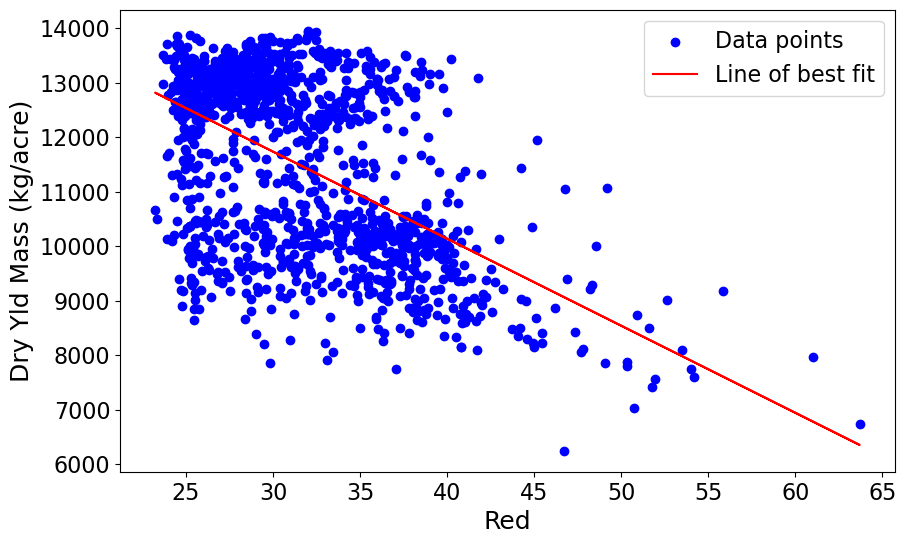

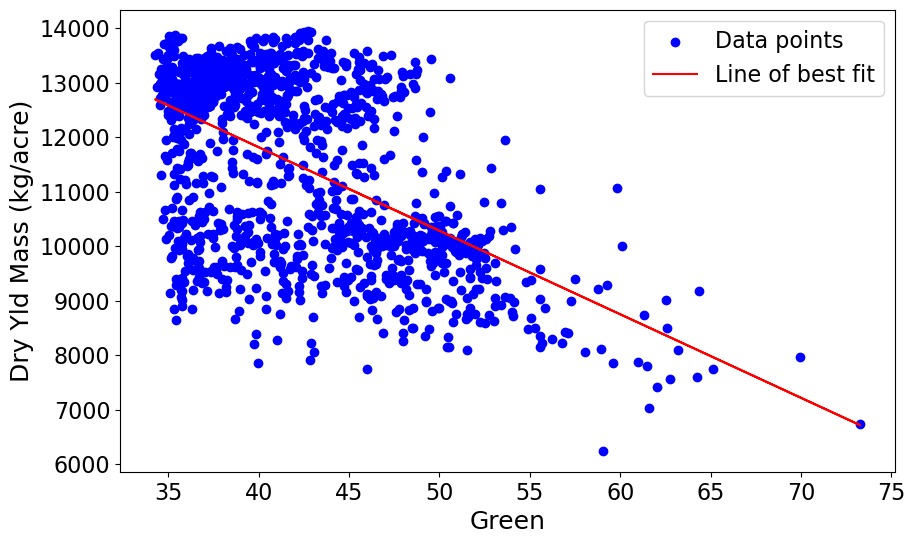

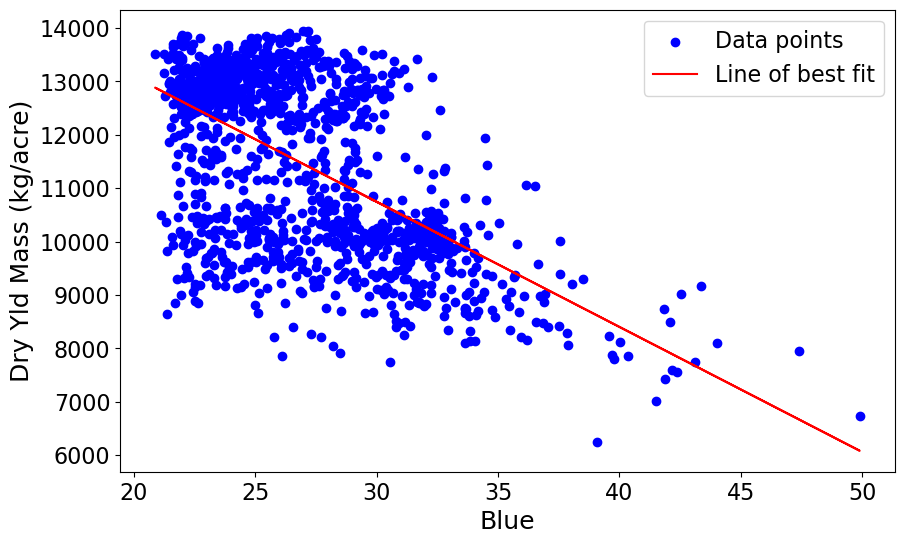

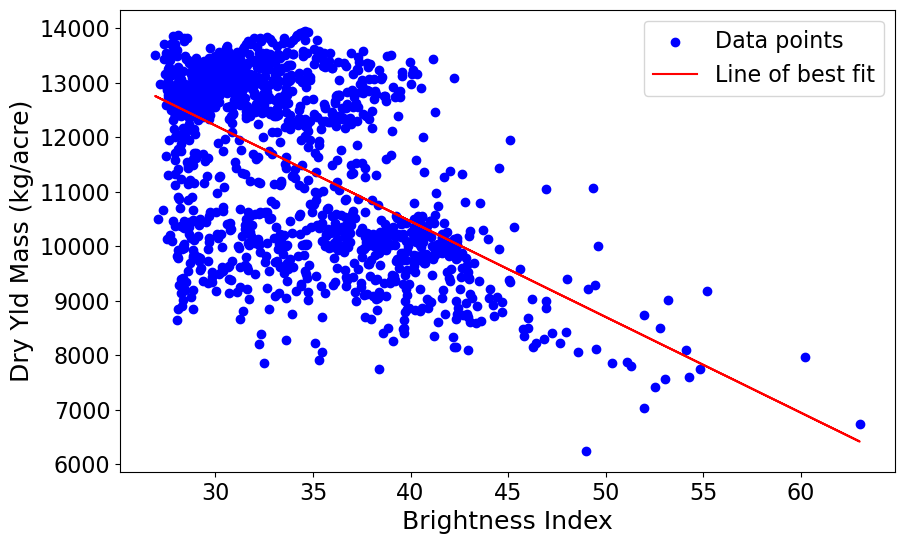

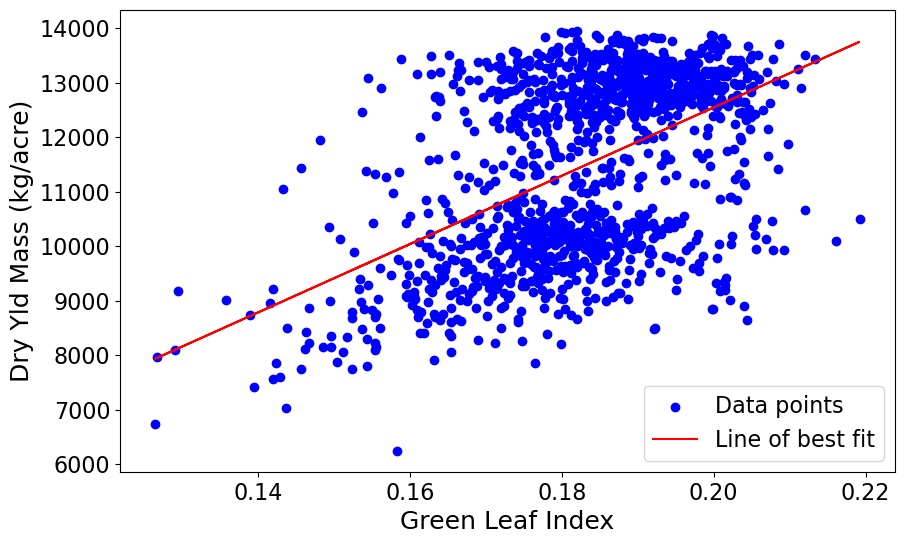

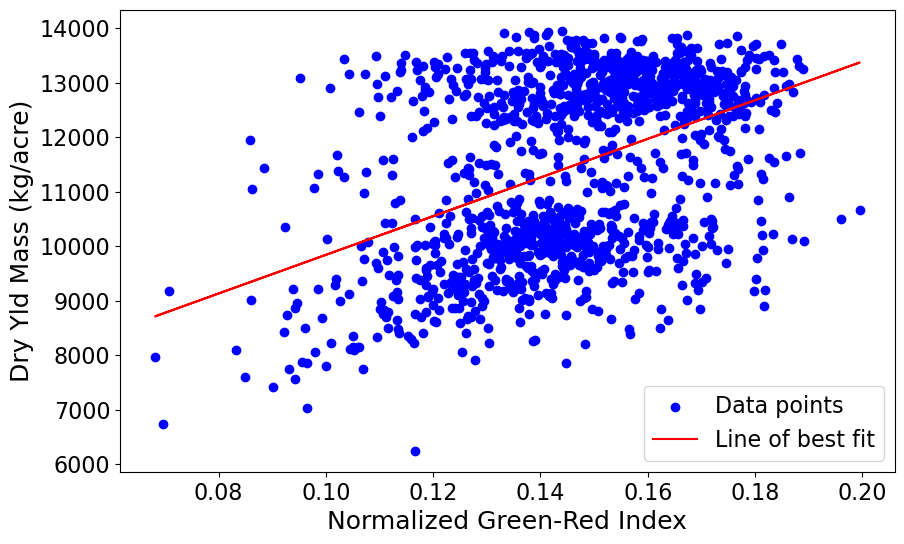

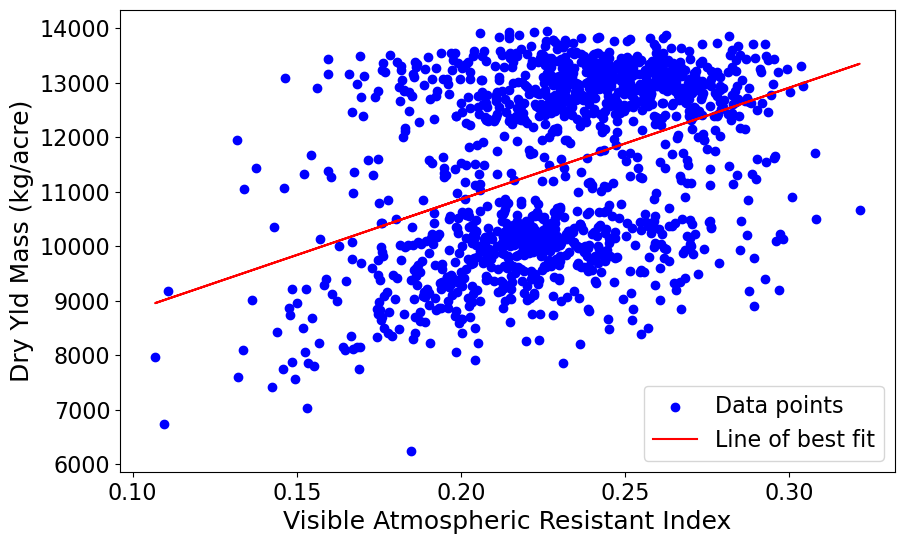

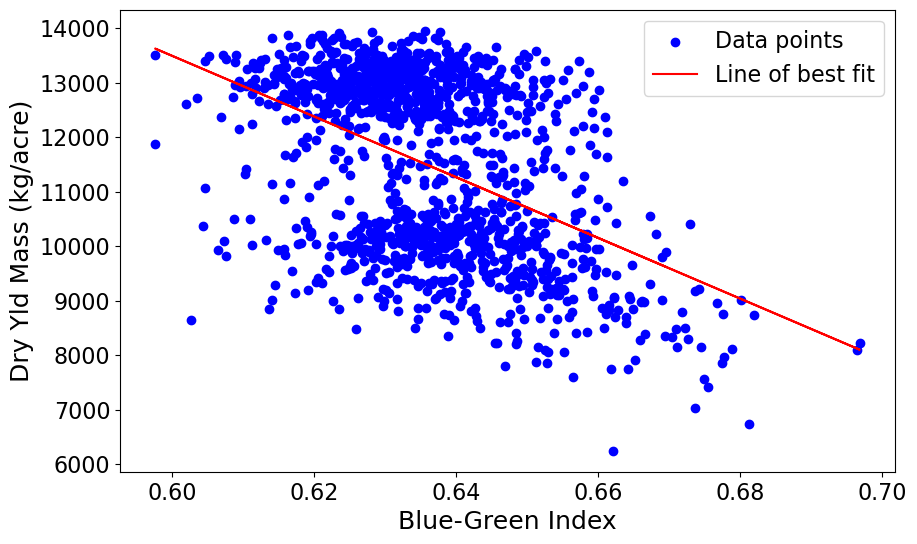

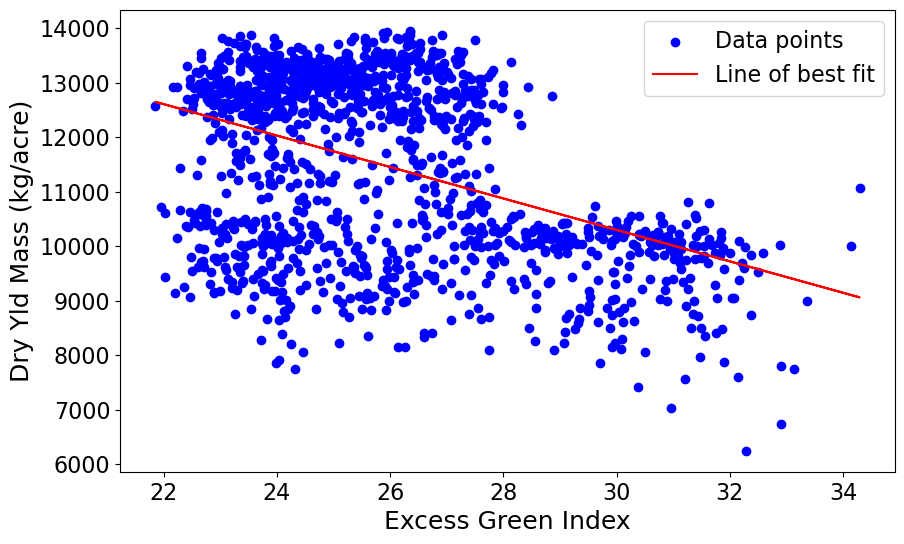

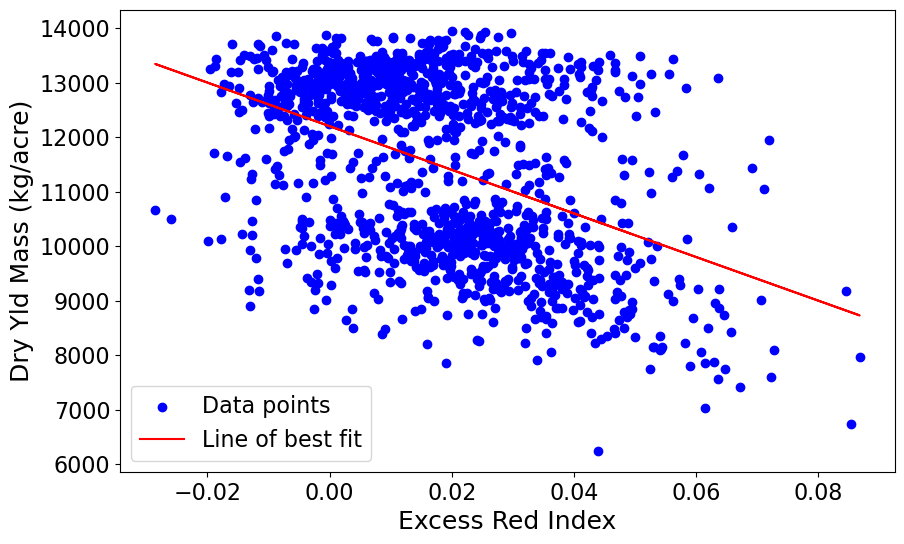

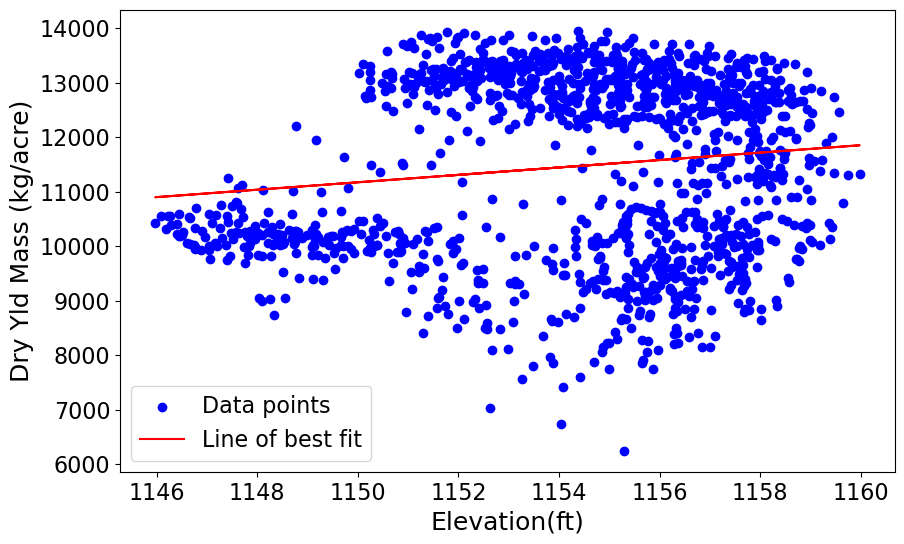

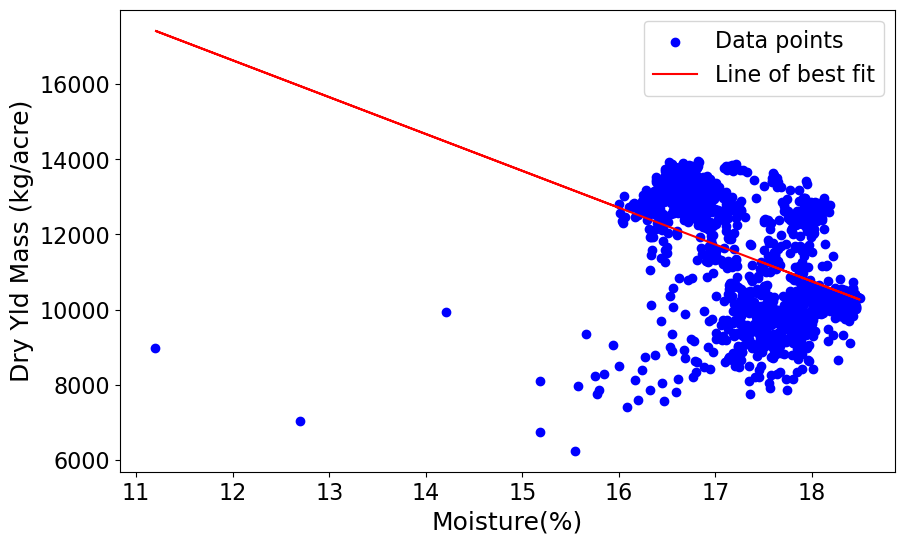

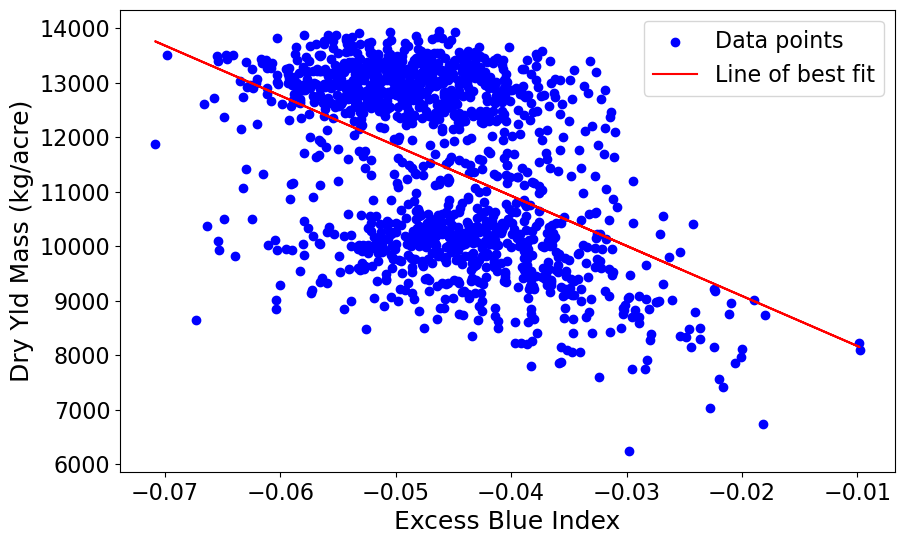

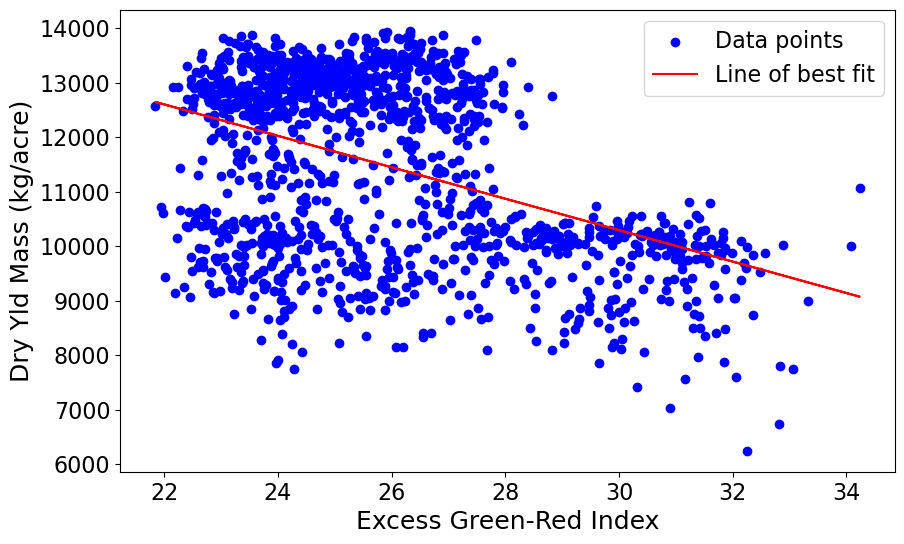

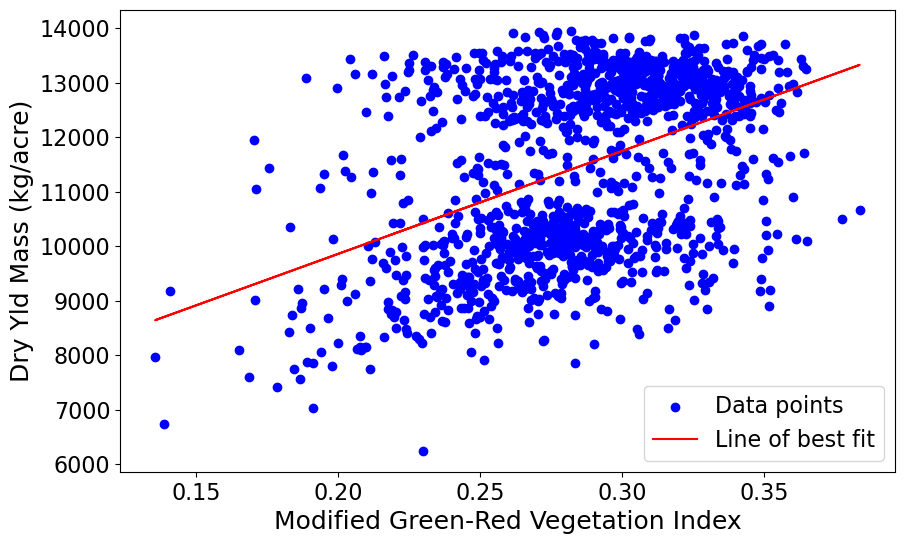

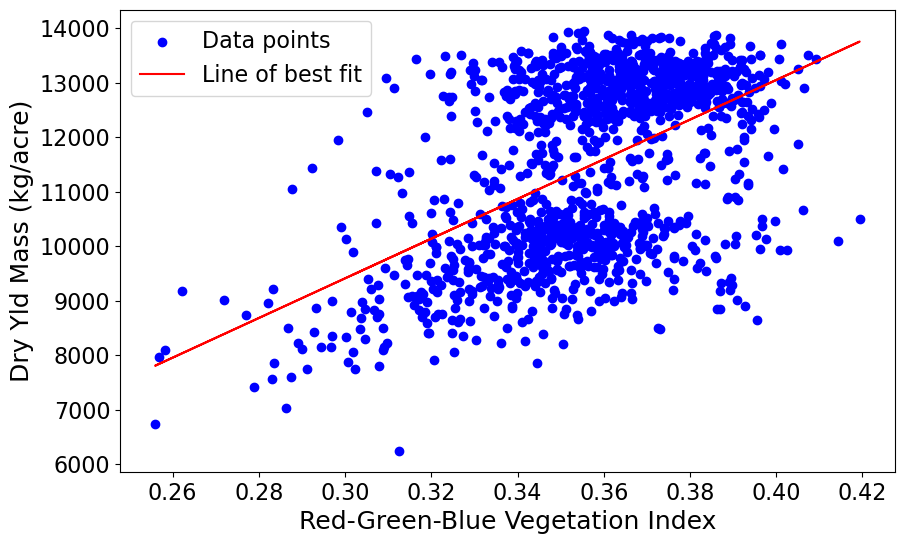

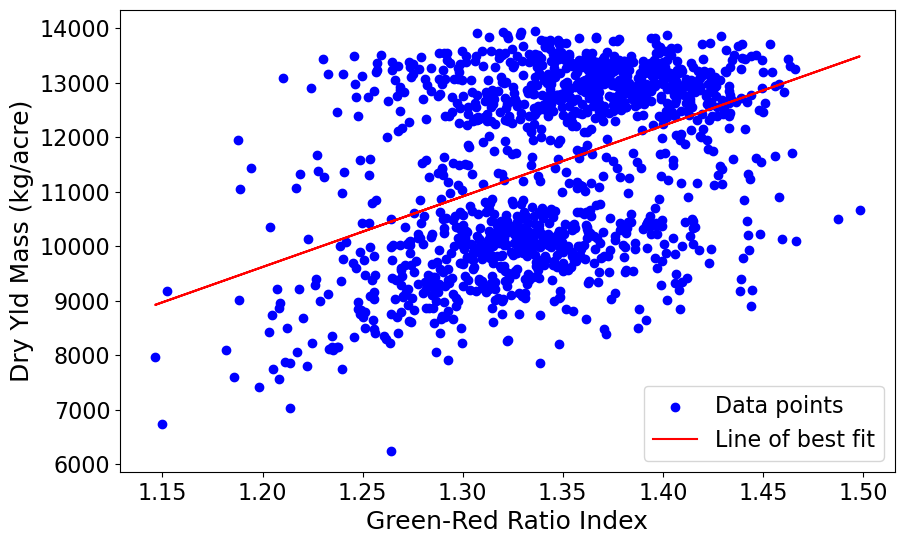

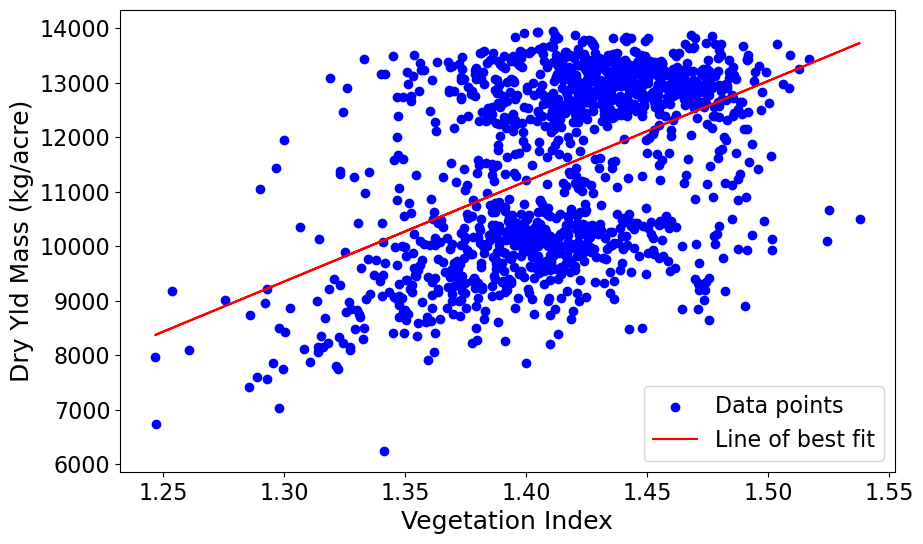

In [81]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
                'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
                'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

for var, title in zip(independent_vars, intitle_vars):
    plot_correlation_graphs_6_18_2020(pf, var, dependent_var, title)

In [82]:
#import data
pf = pd.read_csv('June_23_2020_New.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0     1  2020  6232020  55.994  80.569  48.344  63.150176  0.213955  0.179954   
1    10  2020  6232020  49.068  75.690  43.456  57.807349  0.241308  0.213389   
2   100  2020  6232020  50.407  75.093  42.386  57.666852  0.236206  0.196701   
3  1000  2020  6232020  31.622  49.728  28.543  37.804443  0.246152  0.222569   
4  1001  2020  6232020  34.622  53.089  29.653  40.399774  0.245833  0.210544   

       VARI  ...      right     bottom   Elevation(  Moisture(%    Yld Mass(D  \
0  0.278568  ... -93.539609  44.065627  1155.380859   17.449181   9881.252930   
1  0.327446  ... -93.539609  44.065280  1154.186401   17.942247  12222.727290   
2  0.297014  ... -93.539455  44.064894  1154.231293   17.909068  12463.730960   
3  0.342871  ... -93.537718  44.064894  1151.290283   16.049494  13023.604740   
4  0.318078  ... -93.537679  44.065627  1157.193878   17.780971   9459.528809   

   Yld Vol(Dr  Crop Flw(M   Crop Flw(V          X          Y  
0  176.450726   17.979465  1155.848663 -93.539628  44.065647  
1  218.262737   23.967403  1540.744019 -93.539628  44.065299  
2  222.566361   23.970981  1540.982849 -93.539474  44.064913  
3  232.564087   23.677465  1522.098511 -93.537737  44.064913  
4  168.919975   17.943057  1153.530029 -93.537698  44.065647  

[5 rows x 34 columns]

In [83]:
def plot_correlation_graphs_6_23_2020(df, independent_var, dependent_var, string_var):
    cols = df[[independent_var, dependent_var]]
    X = cols[independent_var].values.reshape(-1, 1)
    y = cols[dependent_var].values
    y = np.minimum(y, 14000)
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    r2 = reg.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, reg.predict(X), color='red', label='Line of best fit')
    
    plt.xlabel(string_var, fontsize=18)
    plt.ylabel("Dry Yld Mass (kg/acre)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16)

    plt.savefig(f'{independent_var}_vs_d_yld_mass_6_23_2020.png', bbox_inches='tight')
    plt.show()

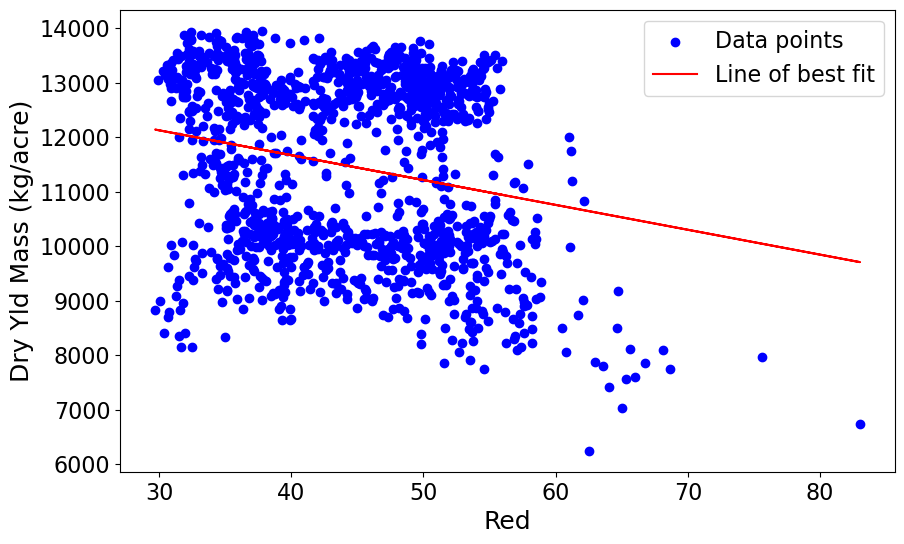

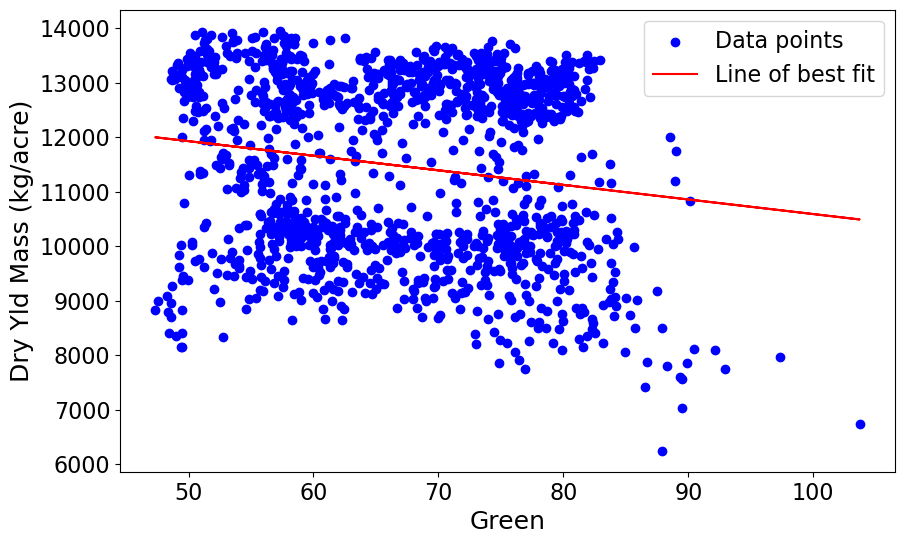

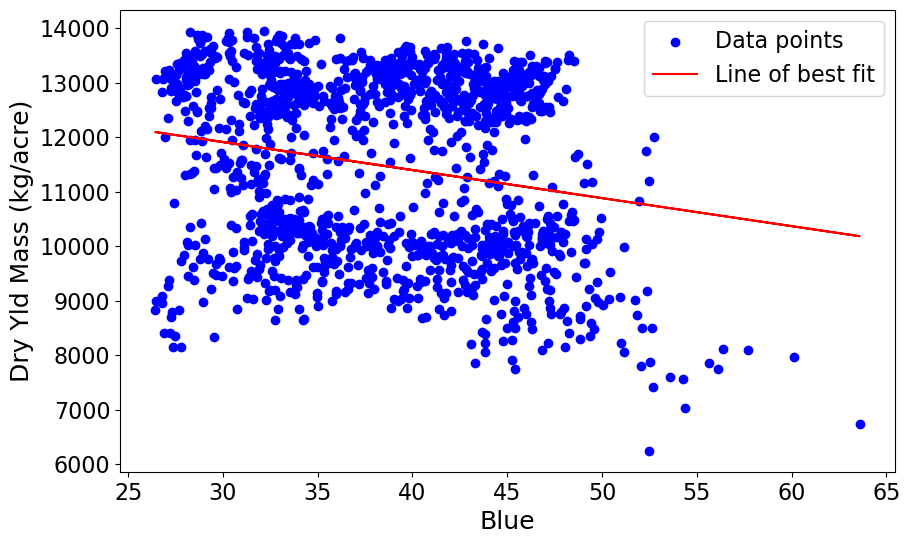

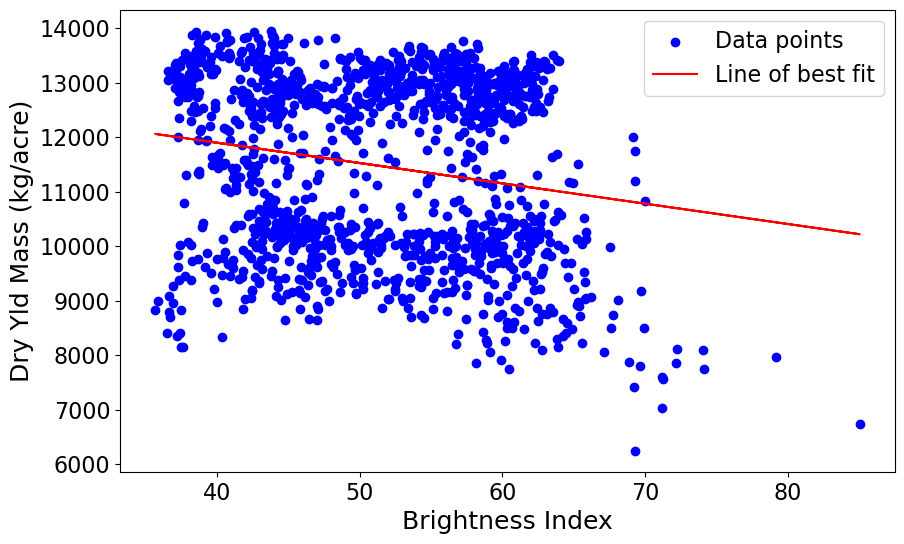

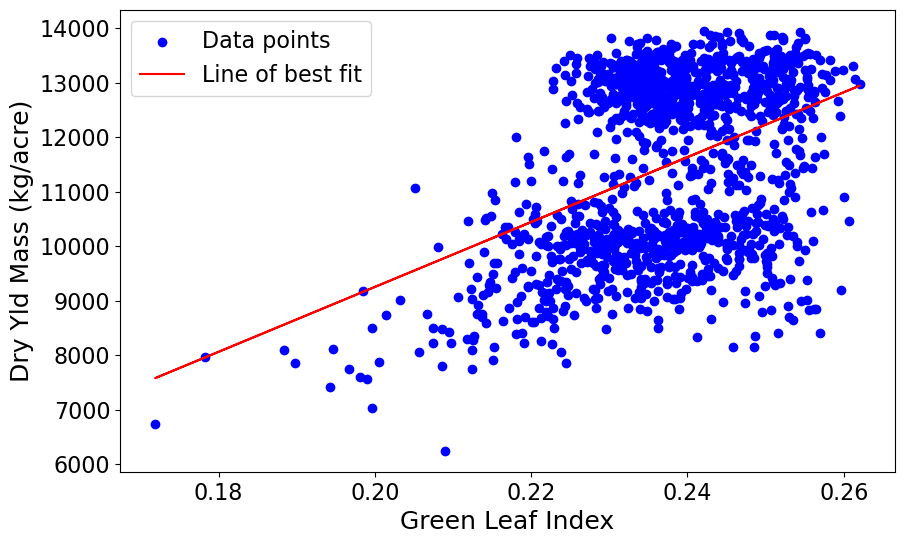

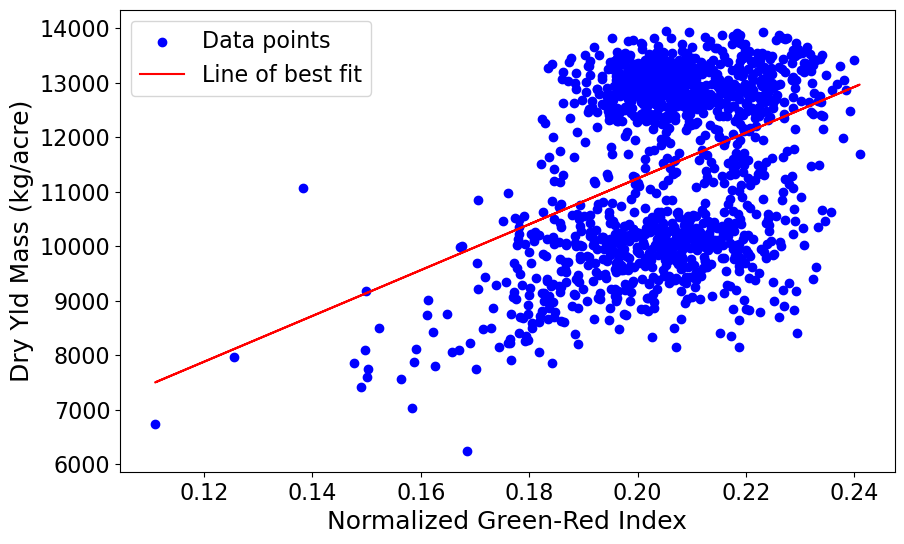

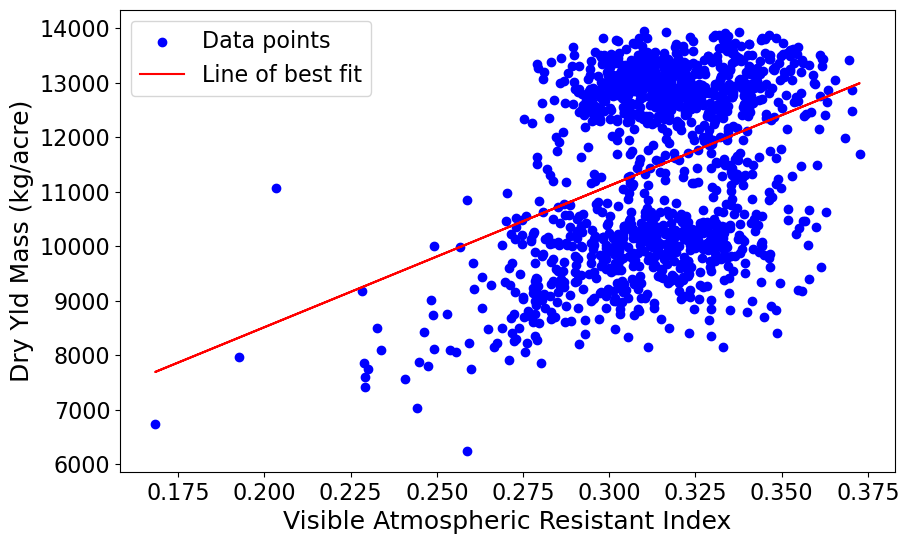

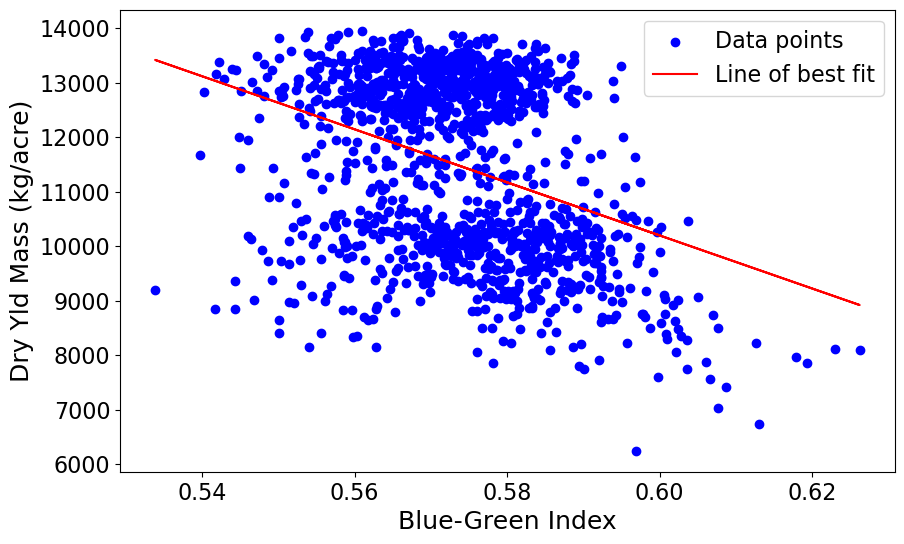

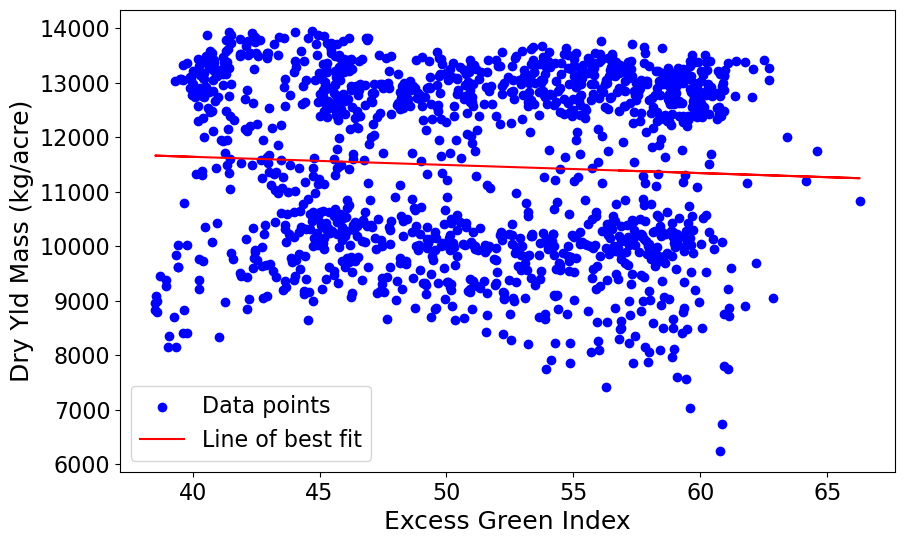

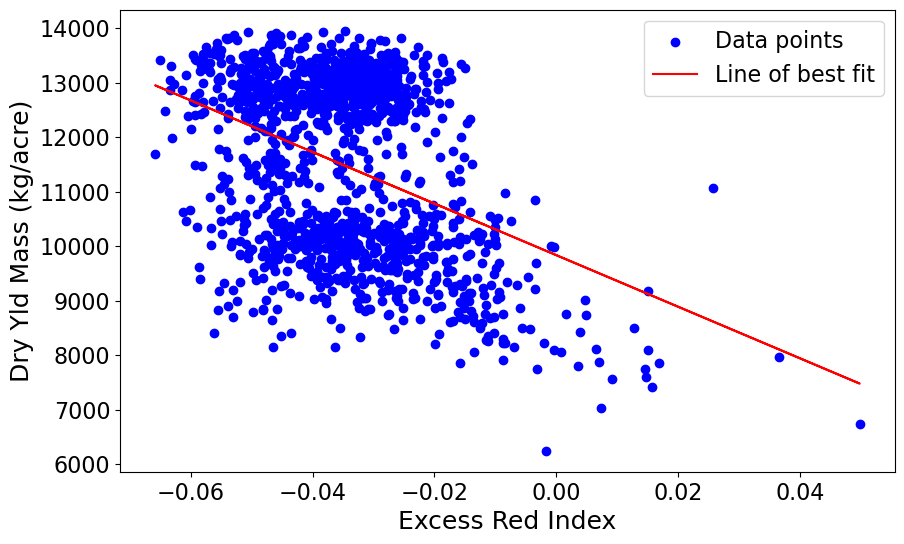

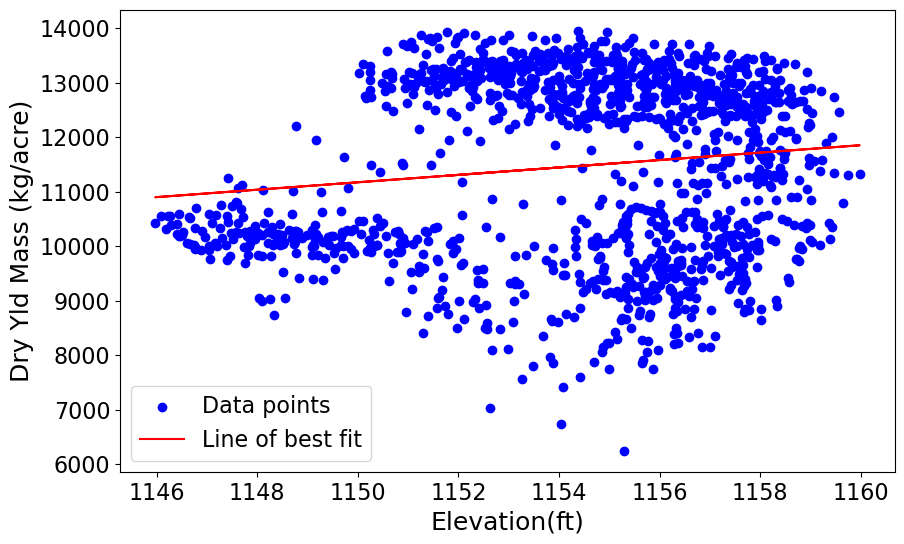

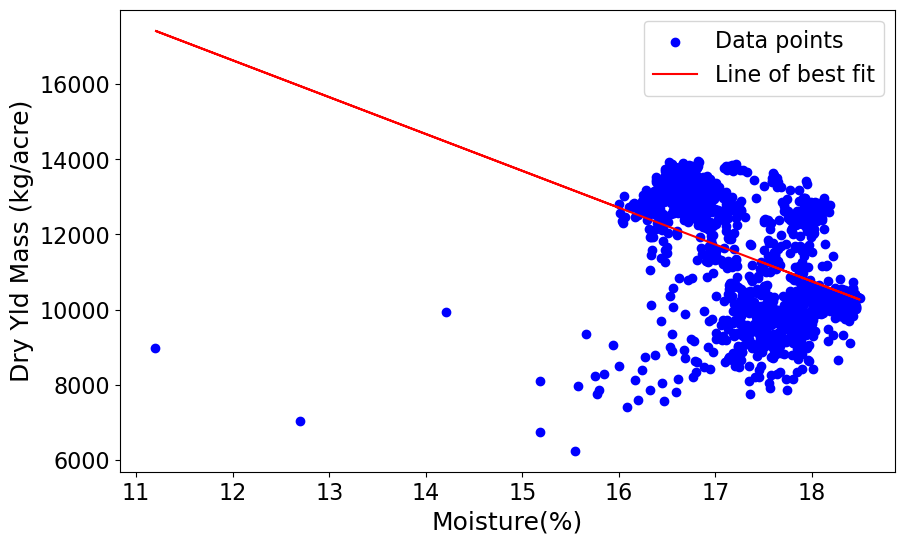

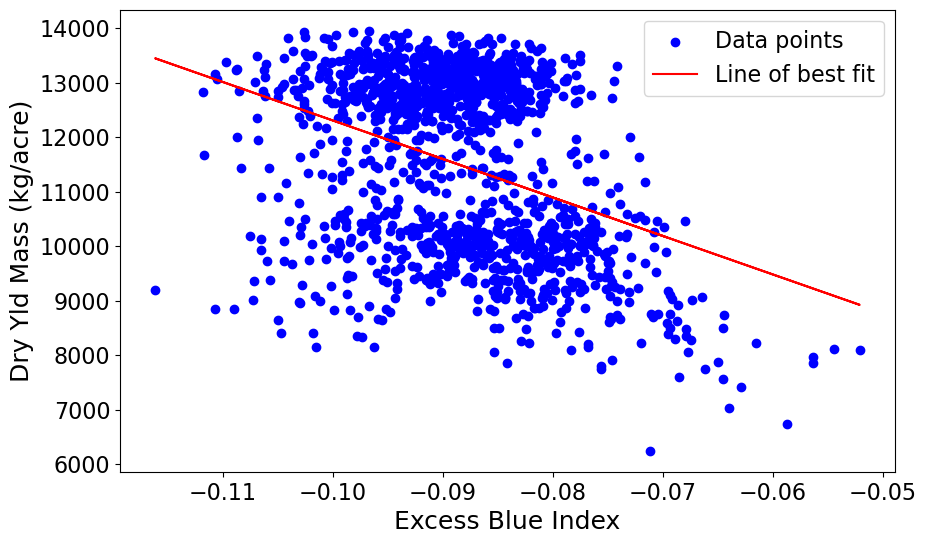

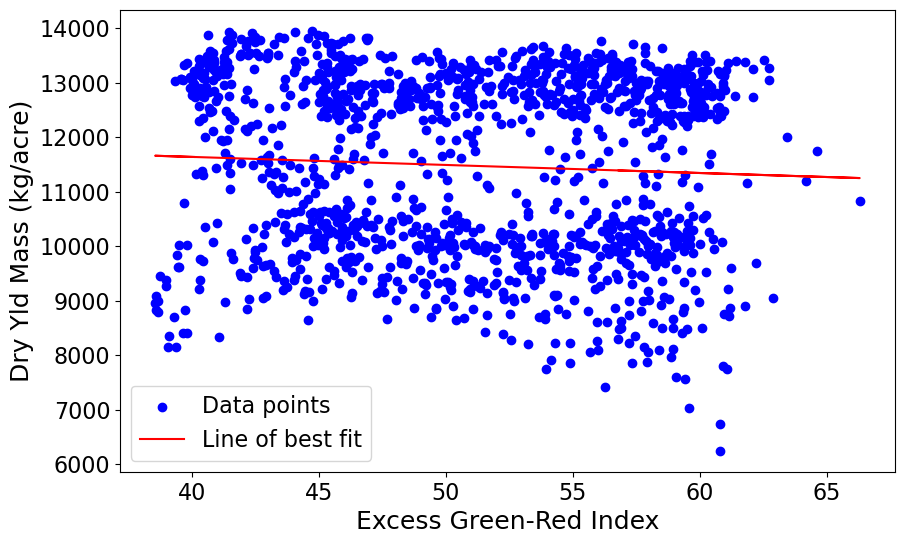

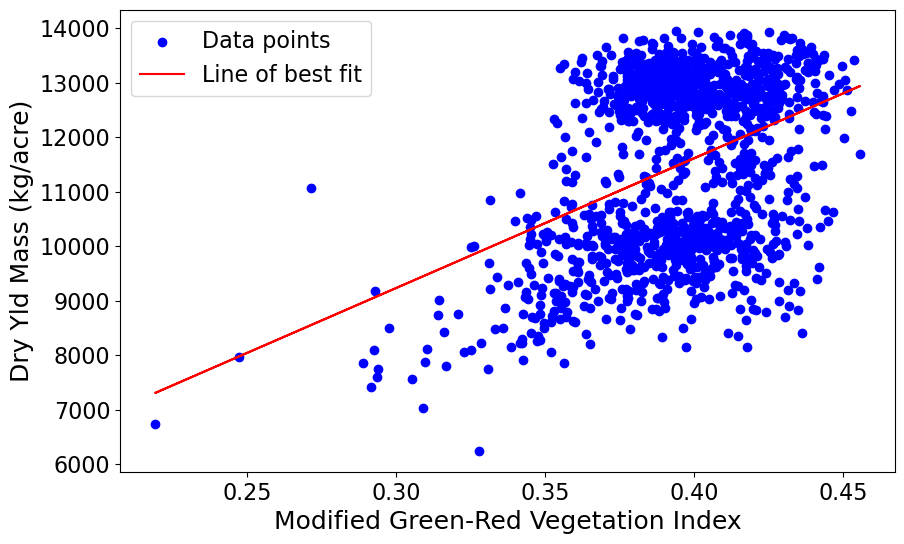

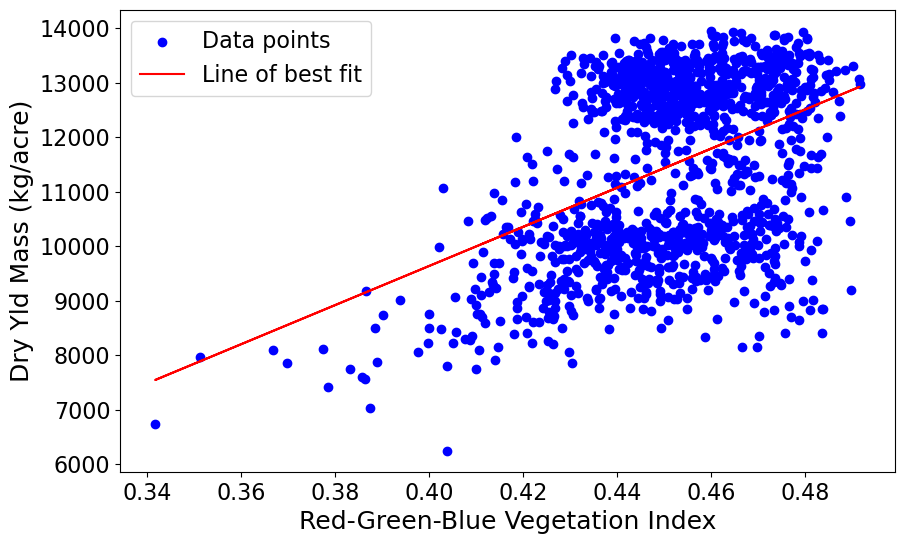

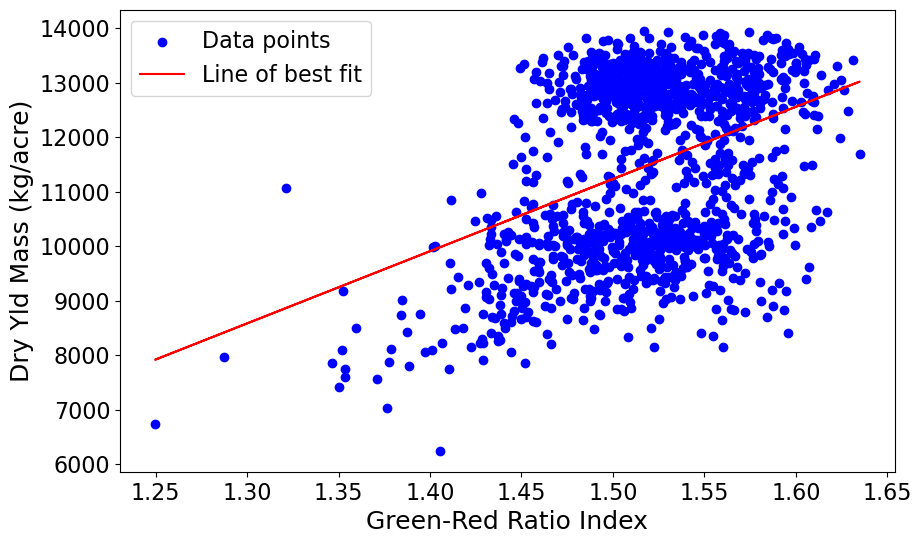

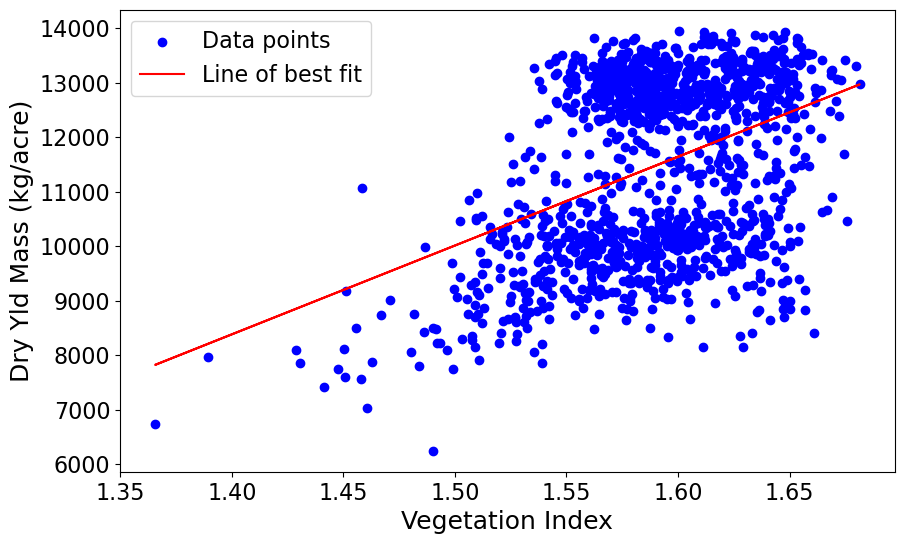

In [84]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
                'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
                'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

for var, title in zip(independent_vars, intitle_vars):
    plot_correlation_graphs_6_23_2020(pf, var, dependent_var, title)

In [85]:
#import data
pf = pd.read_csv('June_30_2020_New.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0     1  2020  6302020  56.705  82.952  53.255  65.657156  0.202796  0.187939   
1    10  2020  6302020  60.073  89.548  56.748  70.351368  0.210448  0.196998   
2   100  2020  6302020  61.672  89.895  56.046  70.771229  0.208640  0.186208   
3  1000  2020  6302020  47.922  72.940  44.051  56.442455  0.226640  0.206996   
4  1001  2020  6302020  59.248  85.908  54.932  68.088263  0.201527  0.183664   

       VARI  ...      right     bottom   Elevation(  Moisture(%    Yld Mass(D  \
0  0.303778  ... -93.539609  44.065627  1155.380859   17.449181   9881.252930   
1  0.317369  ... -93.539609  44.065280  1154.186401   17.942247  12222.727290   
2  0.295464  ... -93.539455  44.064894  1154.231293   17.909068  12463.730960   
3  0.325709  ... -93.537718  44.064894  1151.290283   16.049494  13023.604740   
4  0.295487  ... -93.537679  44.065627  1157.193878   17.780971   9459.528809   

   Yld Vol(Dr  Crop Flw(M   Crop Flw(V          X          Y  
0  176.450726   17.979465  1155.848663 -93.539628  44.065647  
1  218.262737   23.967403  1540.744019 -93.539628  44.065299  
2  222.566361   23.970981  1540.982849 -93.539474  44.064913  
3  232.564087   23.677465  1522.098511 -93.537737  44.064913  
4  168.919975   17.943057  1153.530029 -93.537698  44.065647  

[5 rows x 34 columns]

In [86]:
def plot_correlation_graphs_6_30_2020(df, independent_var, dependent_var, string_var):
    cols = df[[independent_var, dependent_var]]
    X = cols[independent_var].values.reshape(-1, 1)
    y = cols[dependent_var].values
    y = np.minimum(y, 14000)
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    r2 = reg.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, reg.predict(X), color='red', label='Line of best fit')
    
    plt.xlabel(string_var, fontsize=18)
    plt.ylabel("Dry Yld Mass (kg/acre)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16)

    plt.savefig(f'{independent_var}_vs_d_yld_mass_6_30_2020.png', bbox_inches='tight')
    plt.show()

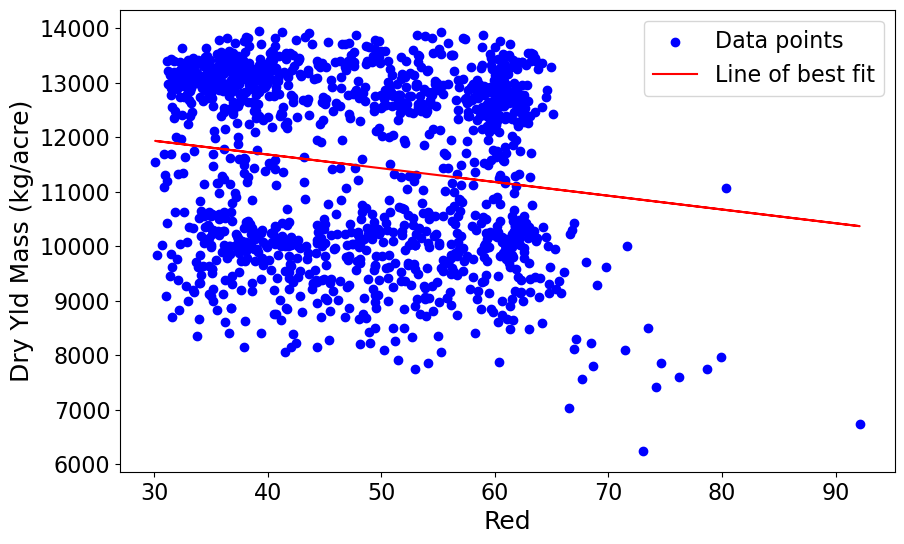

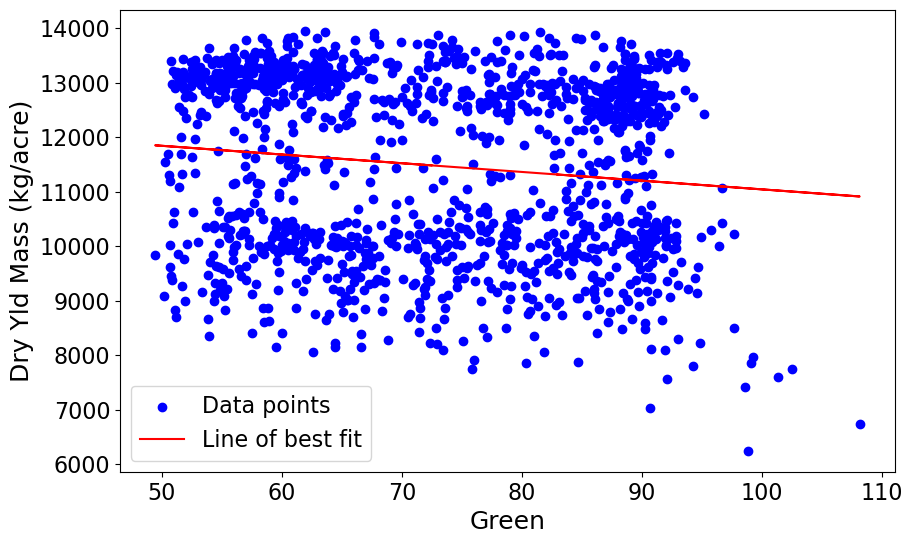

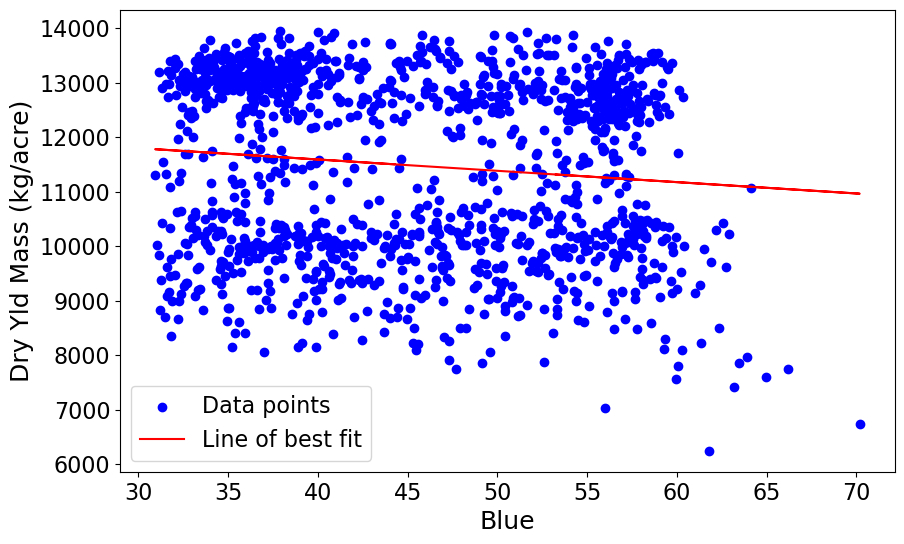

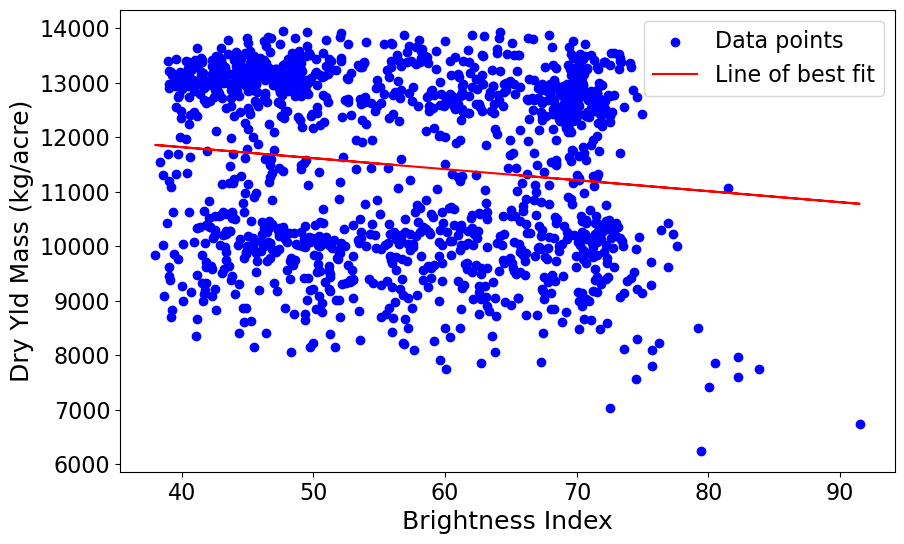

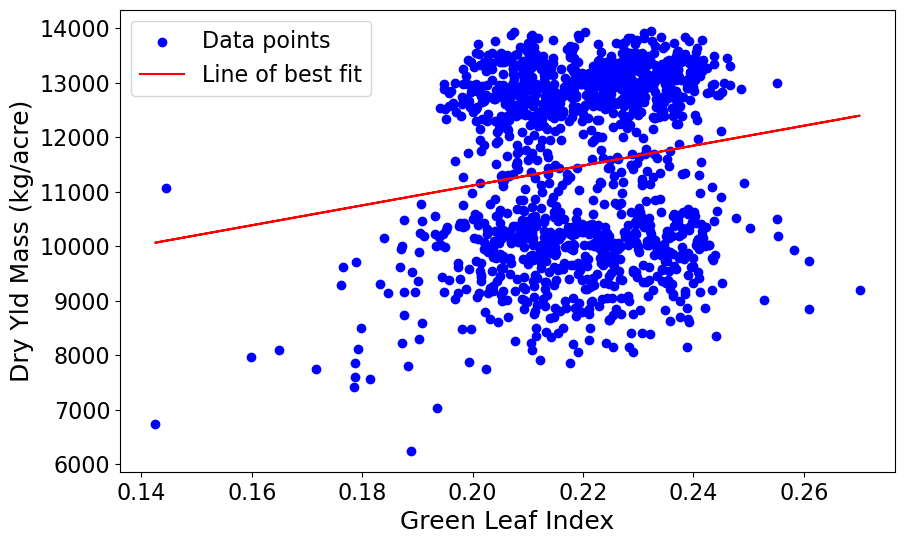

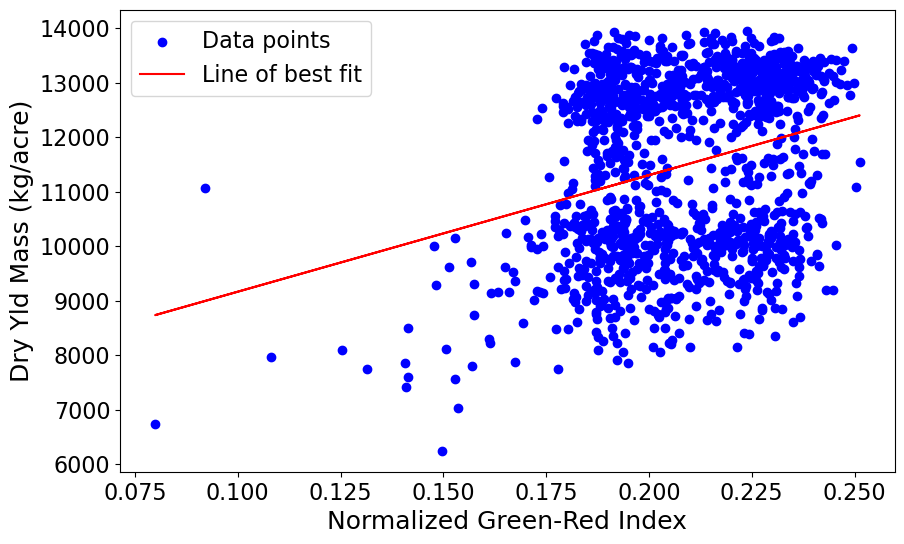

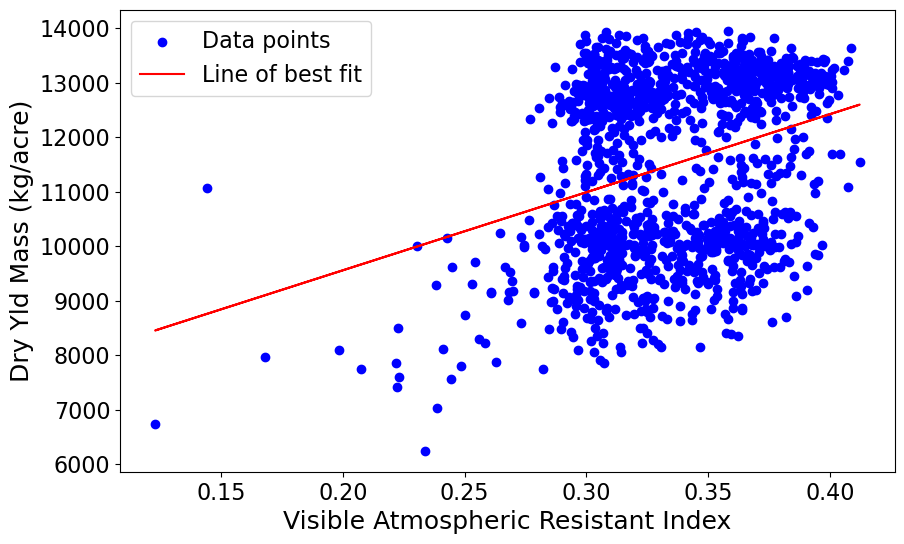

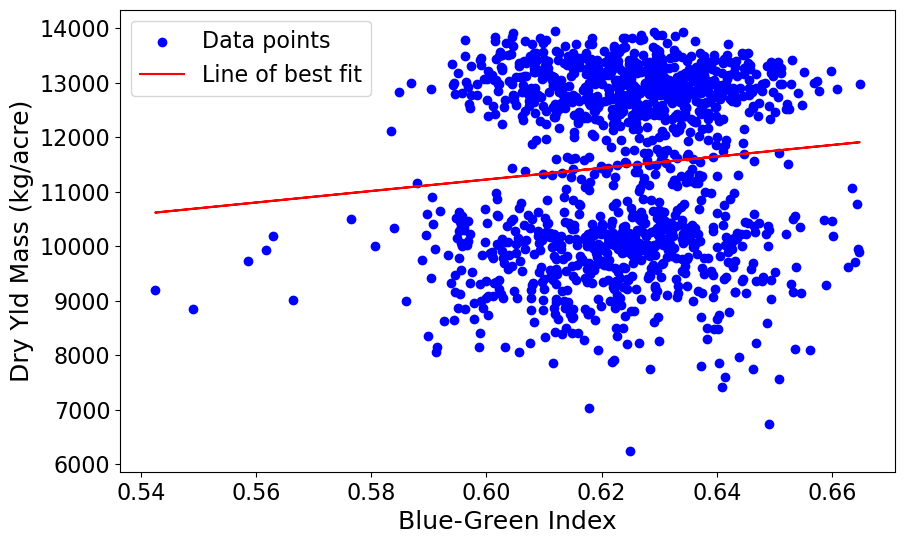

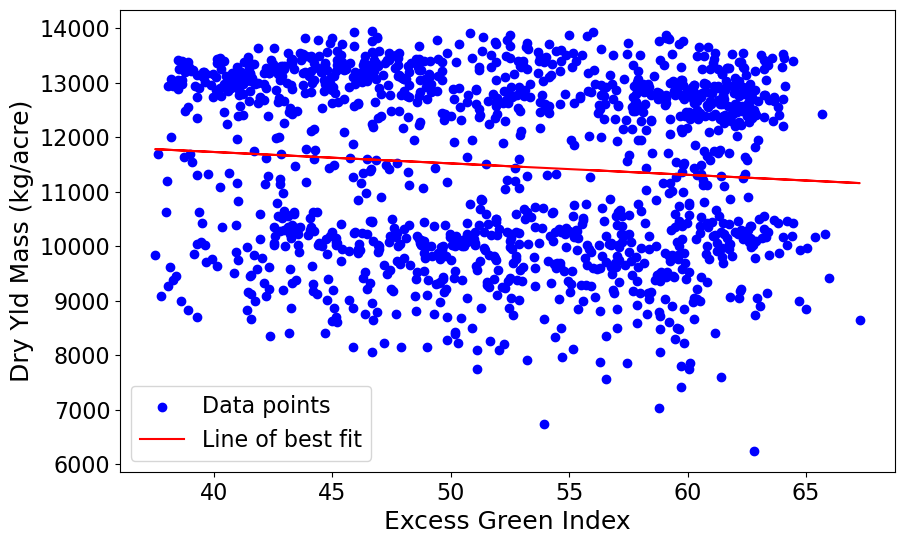

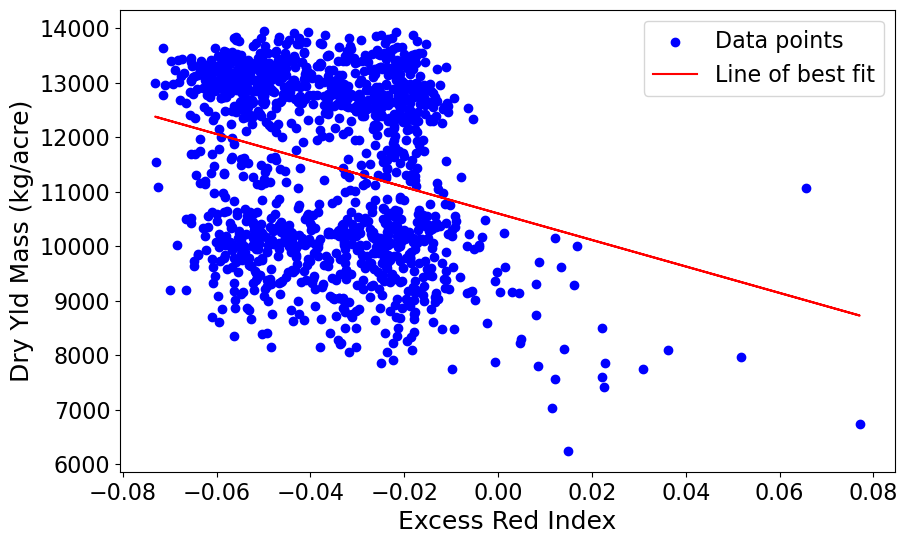

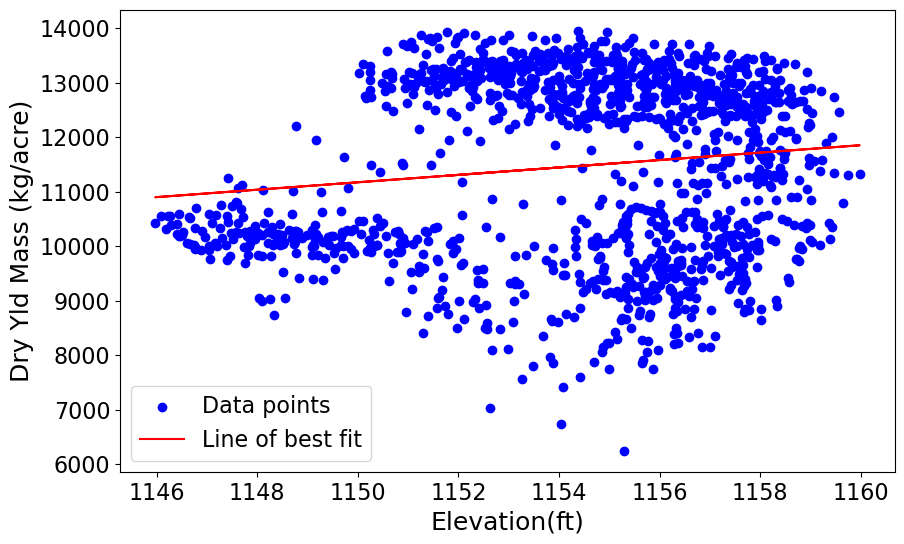

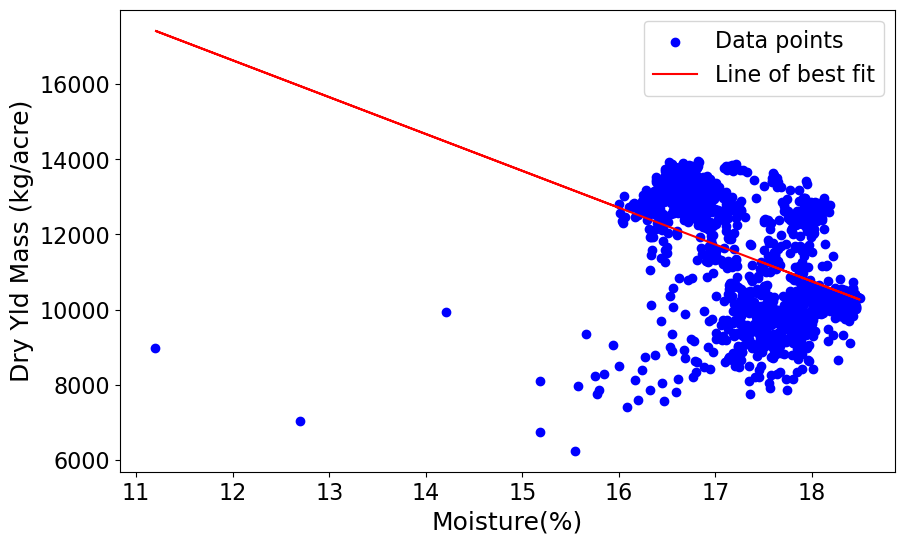

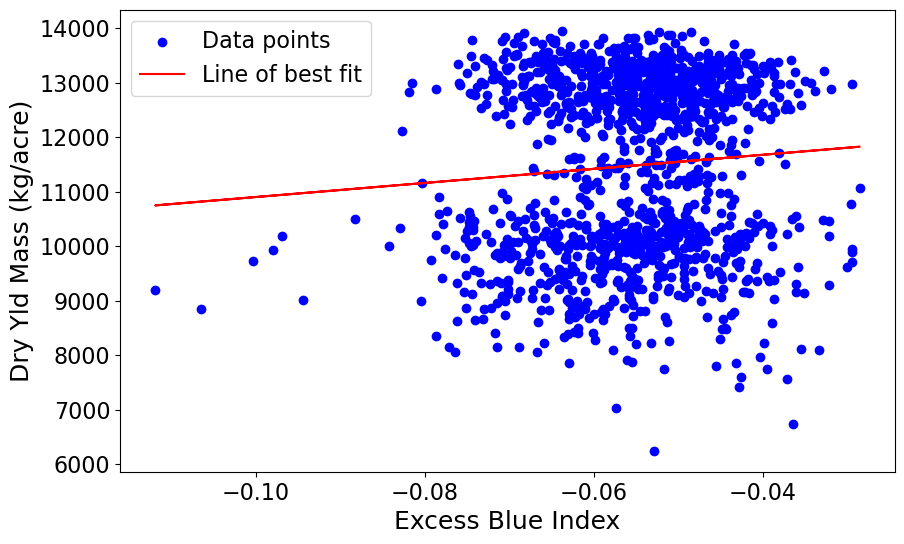

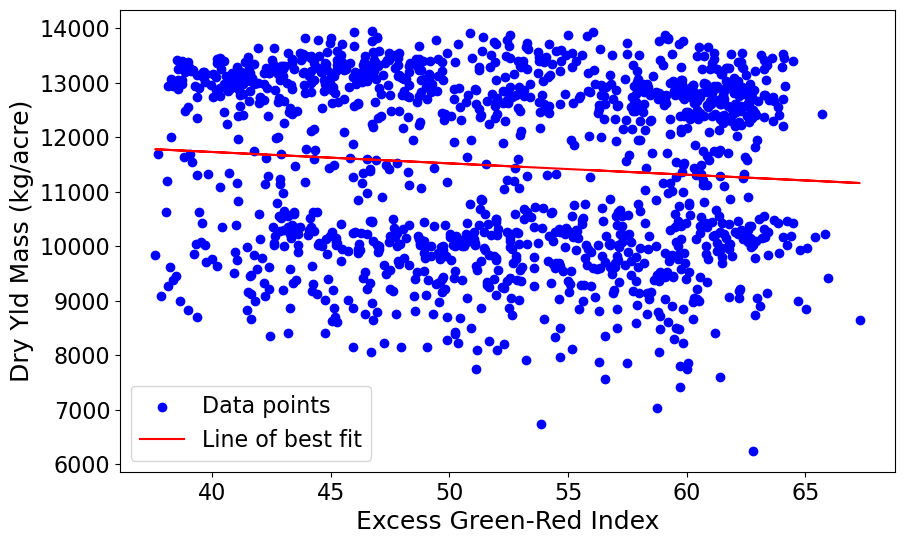

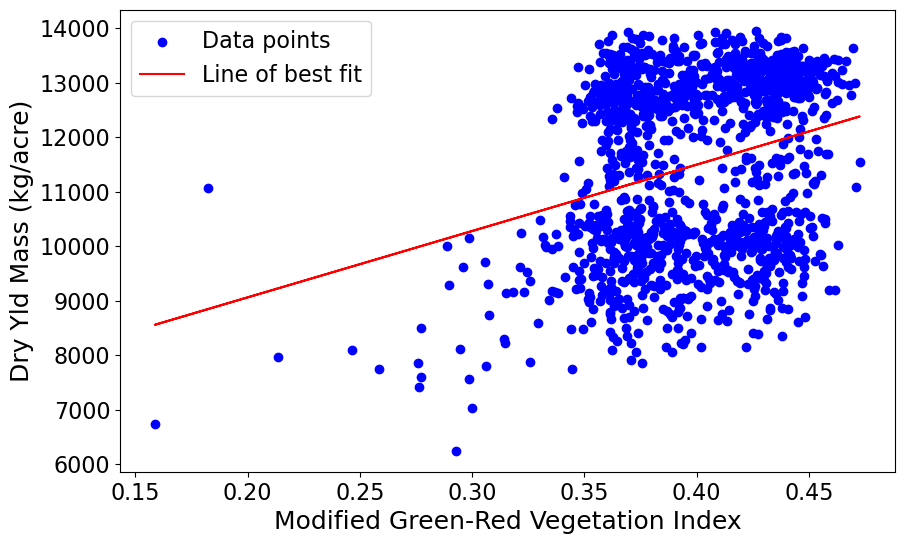

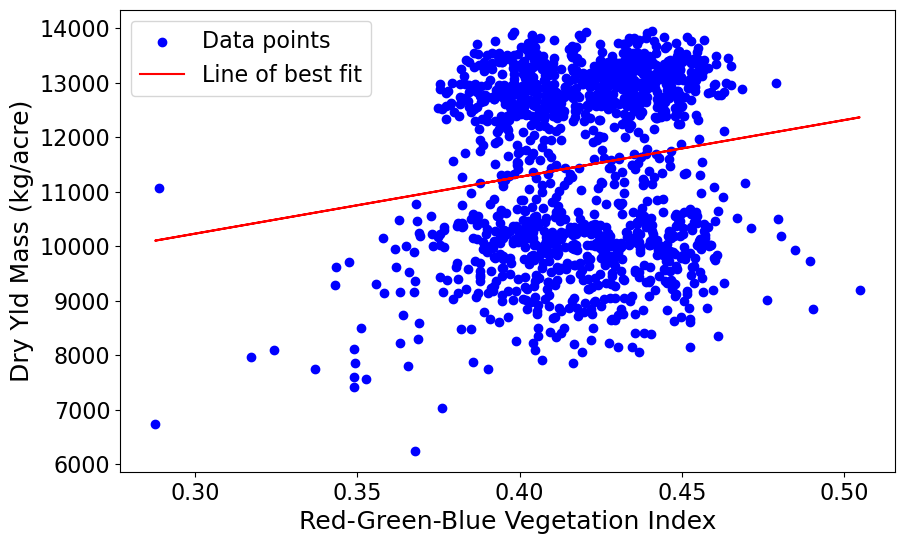

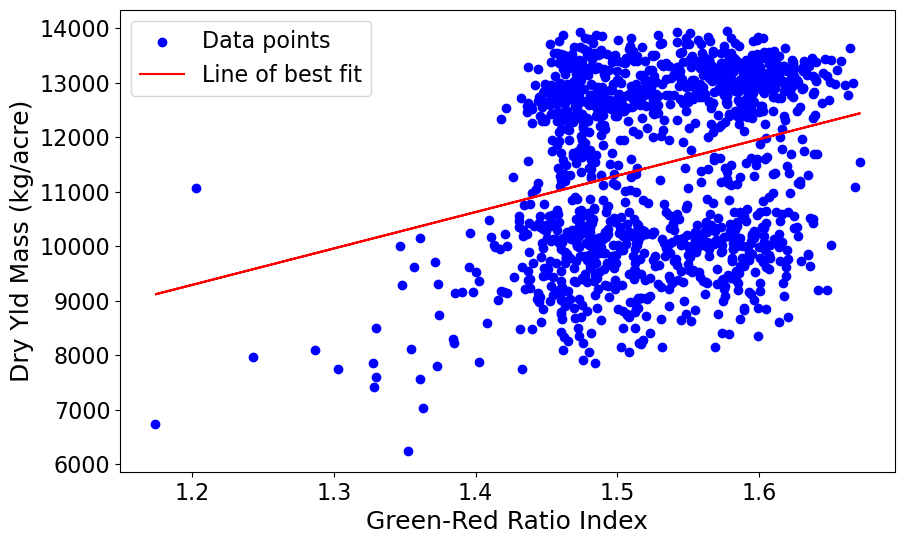

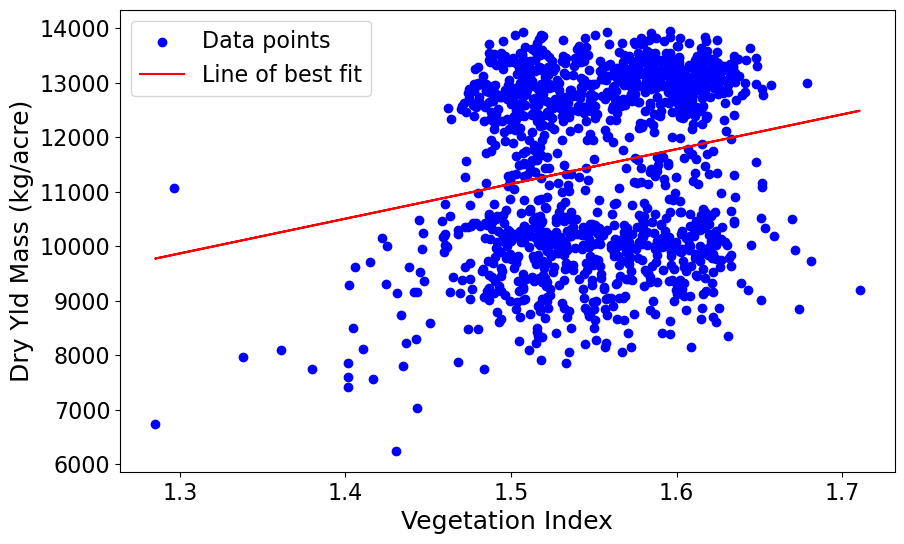

In [87]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
                'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
                'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

for var, title in zip(independent_vars, intitle_vars):
    plot_correlation_graphs_6_30_2020(pf, var, dependent_var, title)

In [88]:
#import data
pf = pd.read_csv('July_6_2020_New.csv') 
pf.head()

Plot  Year     Date     Red    Green    Blue         BI       GLI  \
0     1  2020  7062020  40.327   64.136  37.284  48.750351  0.246067   
1    10  2020  7062020  38.754   62.752  36.086  47.405645  0.252885   
2   100  2020  7062020  38.045   62.098  35.574  46.794206  0.255678   
3  1000  2020  7062020  67.519   98.222  61.001  77.303511  0.209020   
4  1001  2020  7062020  71.878  103.180  64.797  81.672538  0.203143   

      NGRDI      VARI  ...      right     bottom   Elevation(  Moisture(%  \
0  0.227918  0.354411  ... -93.539609  44.065627  1155.380859   17.449181   
1  0.236420  0.366830  ... -93.539609  44.065280  1154.186401   17.942247   
2  0.240187  0.372516  ... -93.539455  44.064894  1154.231293   17.909068   
3  0.185247  0.293135  ... -93.537718  44.064894  1151.290283   16.049494   
4  0.178809  0.283890  ... -93.537679  44.065627  1157.193878   17.780971   

     Yld Mass(D  Yld Vol(Dr  Crop Flw(M   Crop Flw(V          X          Y  
0   9881.252930  176.450726   17.979465  1155.848663 -93.539628  44.065647  
1  12222.727290  218.262737   23.967403  1540.744019 -93.539628  44.065299  
2  12463.730960  222.566361   23.970981  1540.982849 -93.539474  44.064913  
3  13023.604740  232.564087   23.677465  1522.098511 -93.537737  44.064913  
4   9459.528809  168.919975   17.943057  1153.530029 -93.537698  44.065647  

[5 rows x 34 columns]

In [89]:
def plot_correlation_graphs_7_6_2020(df, independent_var, dependent_var, string_var):
    cols = df[[independent_var, dependent_var]]
    X = cols[independent_var].values.reshape(-1, 1)
    y = cols[dependent_var].values
    y = np.minimum(y, 14000)
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    r2 = reg.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, reg.predict(X), color='red', label='Line of best fit')
    
    plt.xlabel(string_var, fontsize=18)
    plt.ylabel("Dry Yld Mass (kg/acre)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16)

    plt.savefig(f'{independent_var}_vs_d_yld_mass_7_6_2020.png', bbox_inches='tight')
    plt.show()

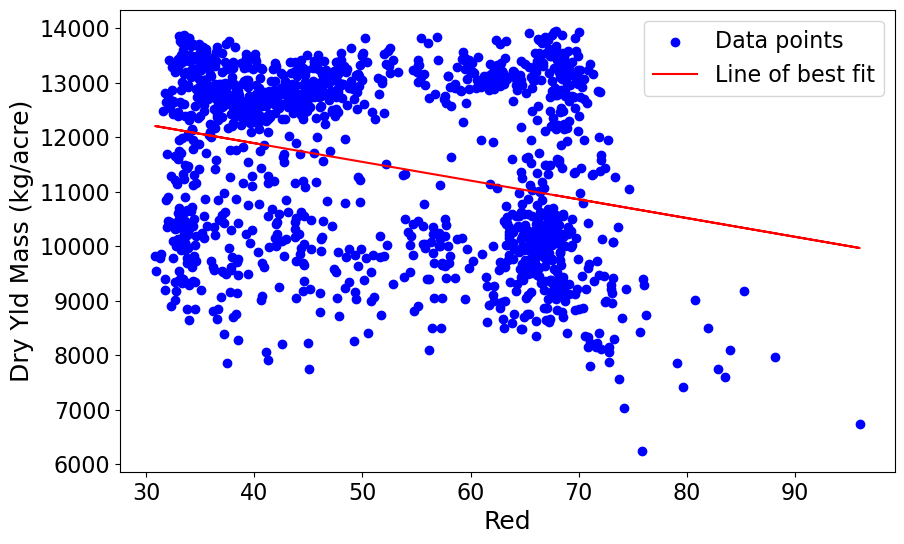

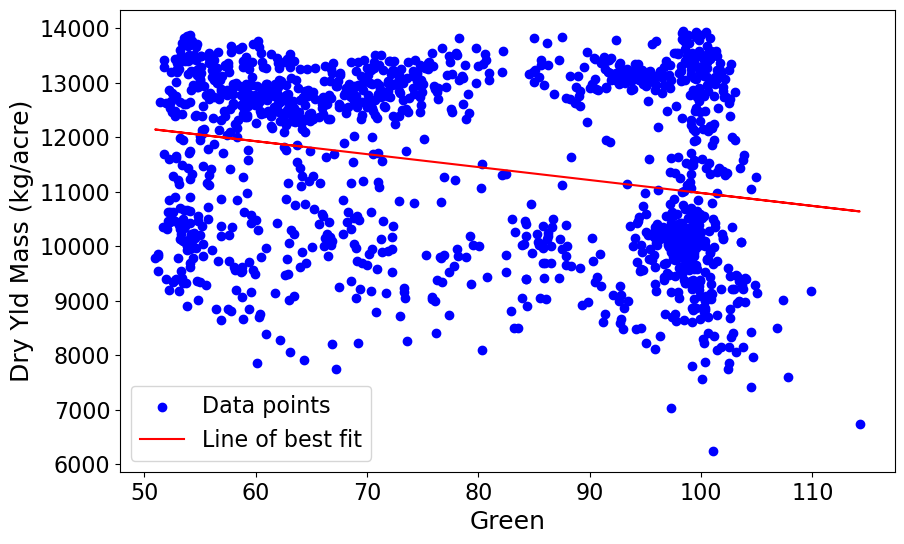

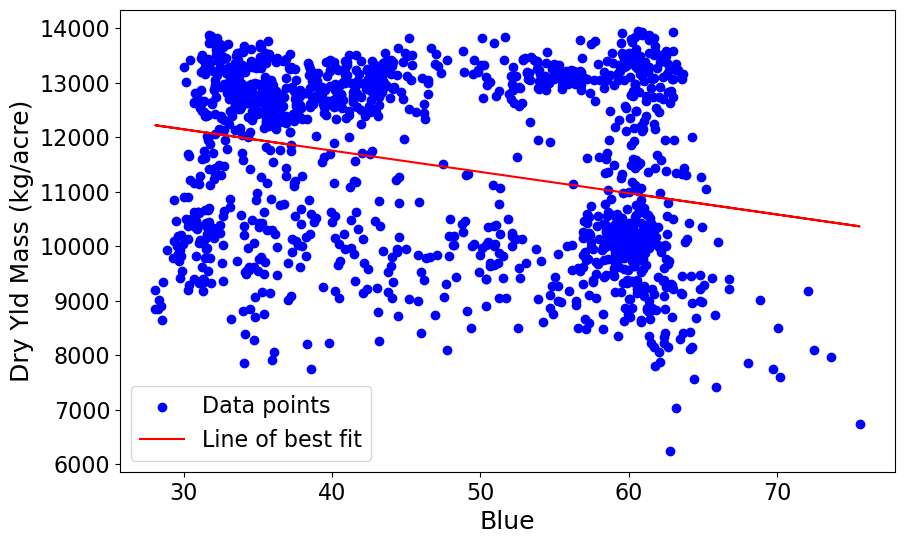

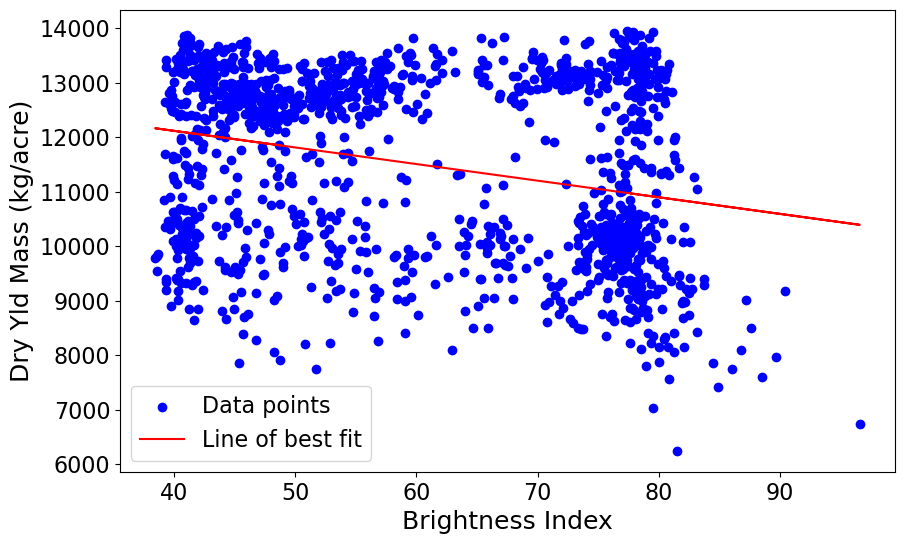

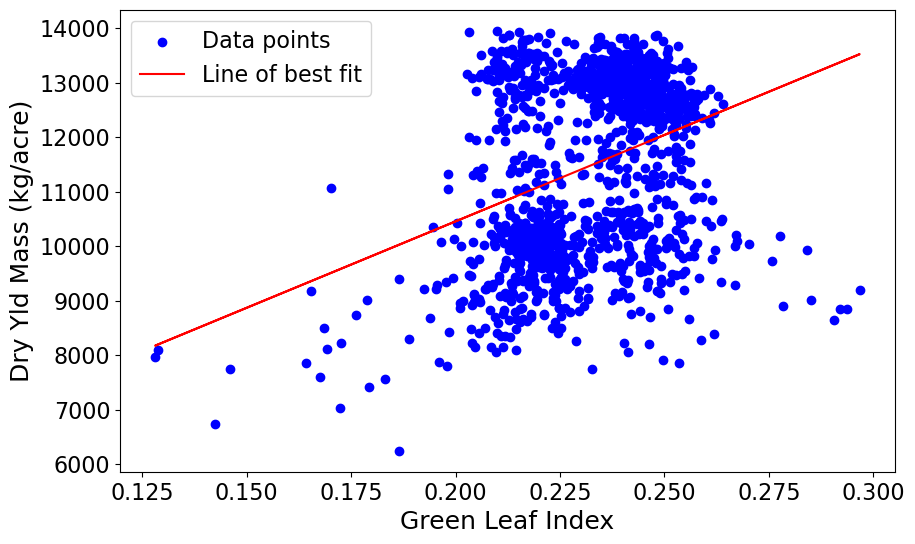

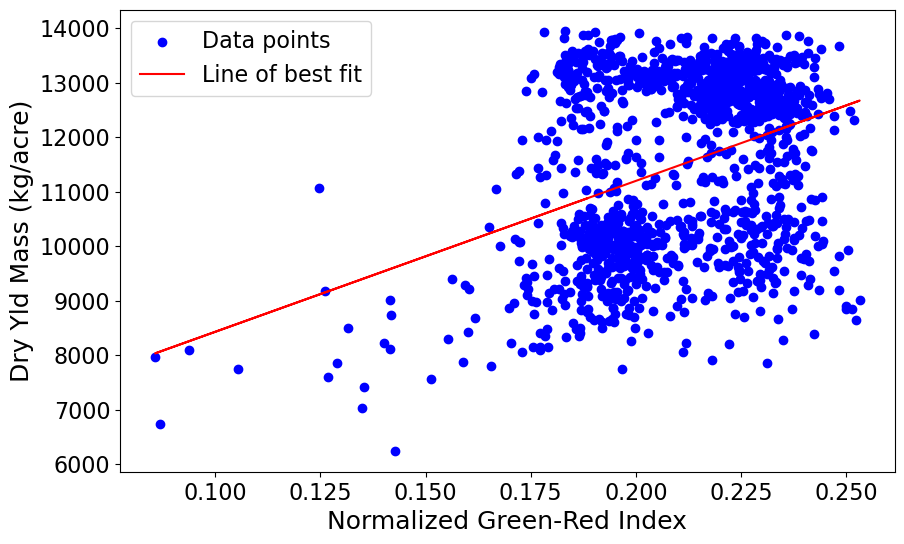

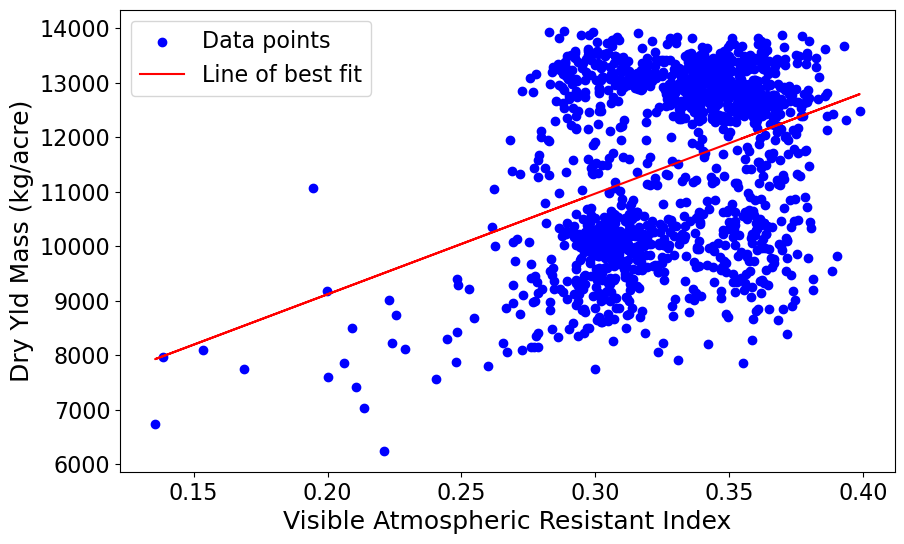

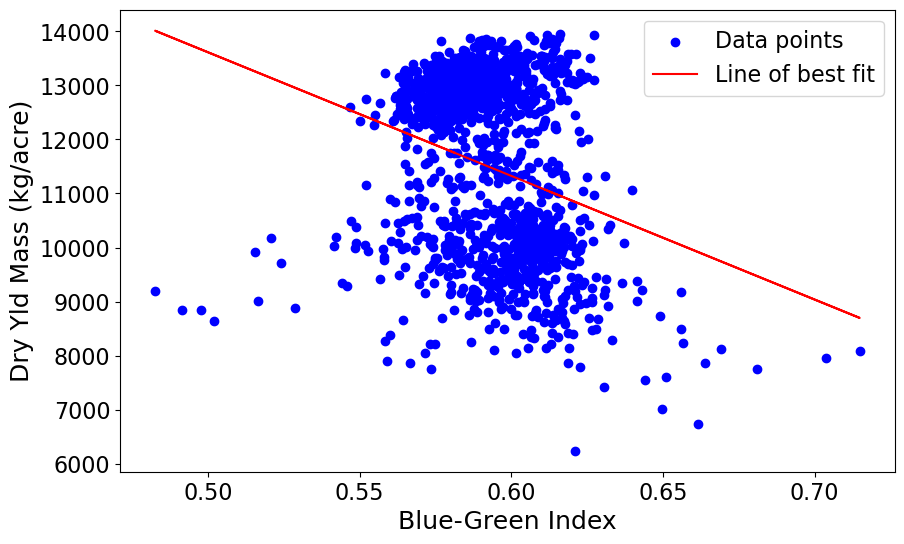

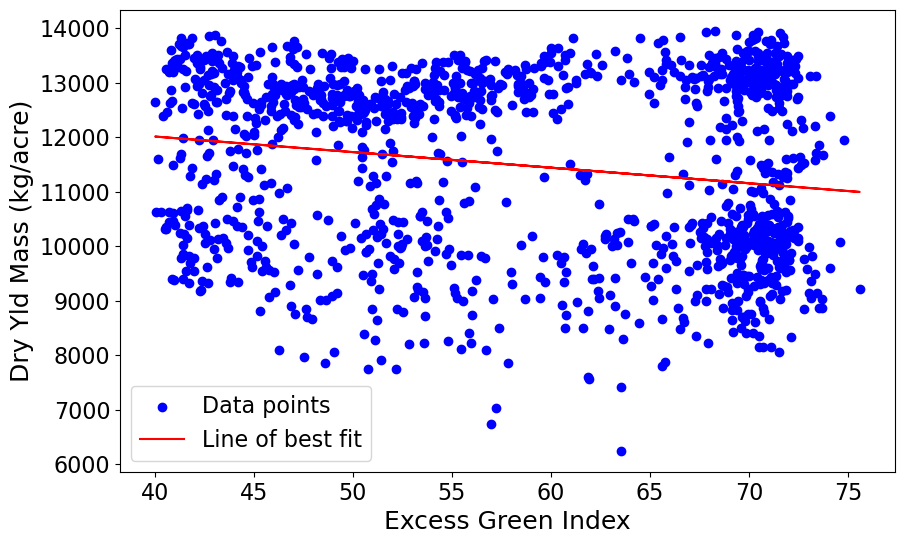

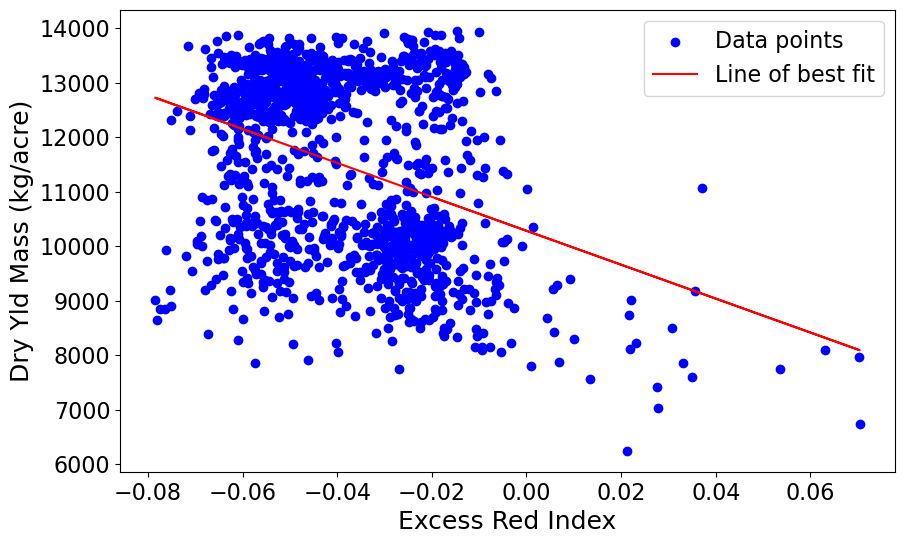

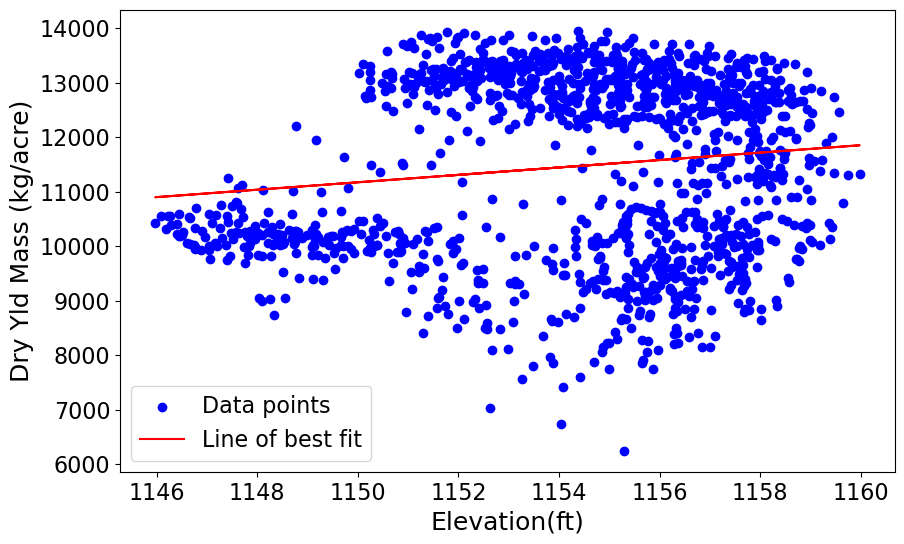

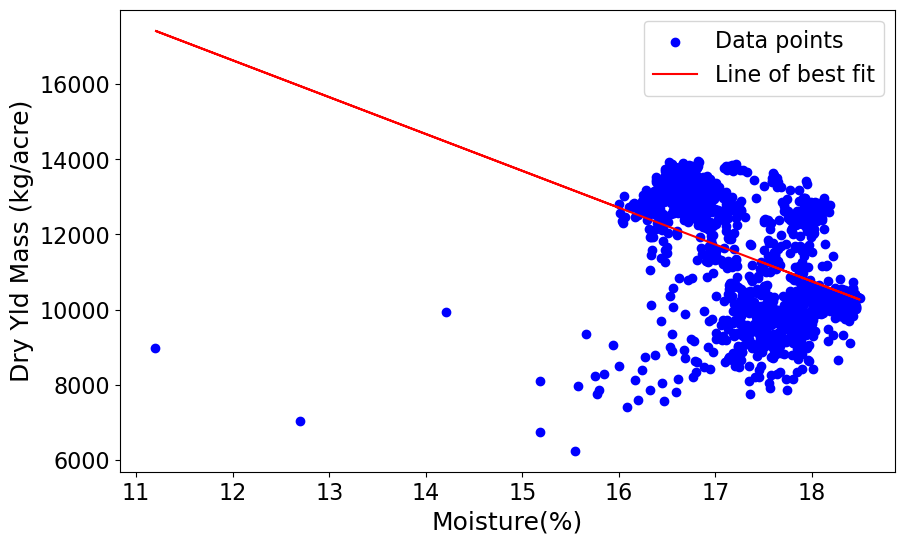

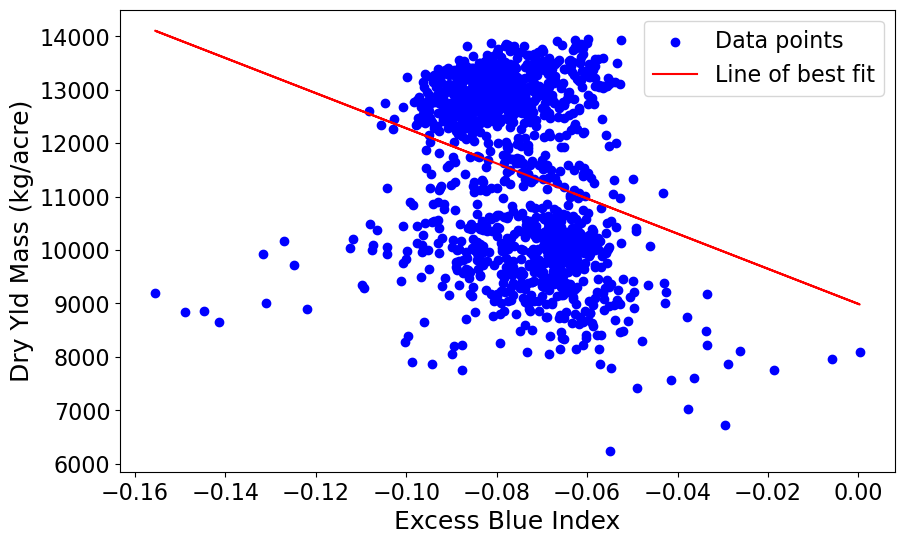

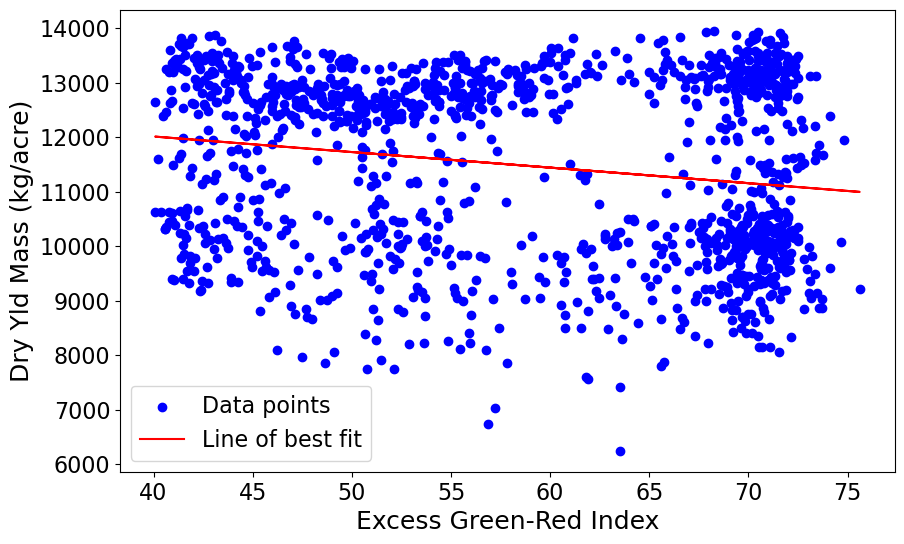

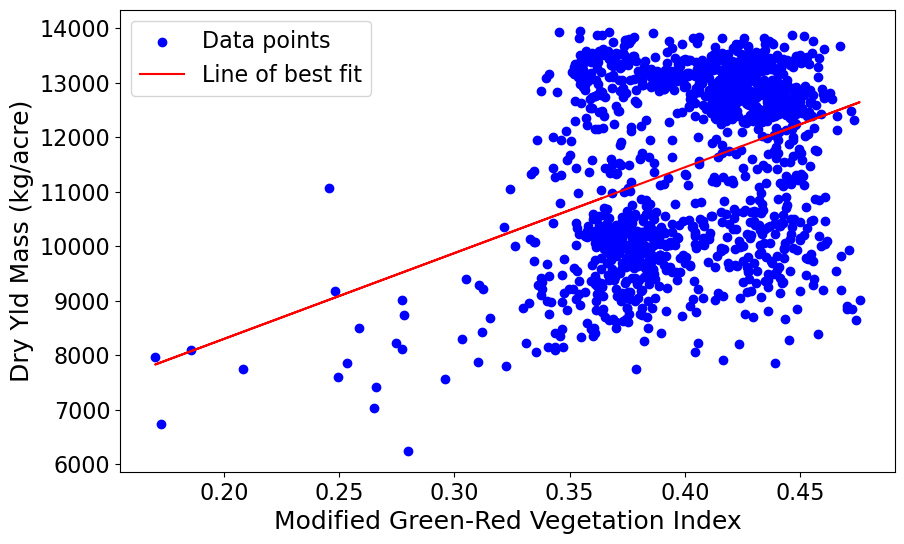

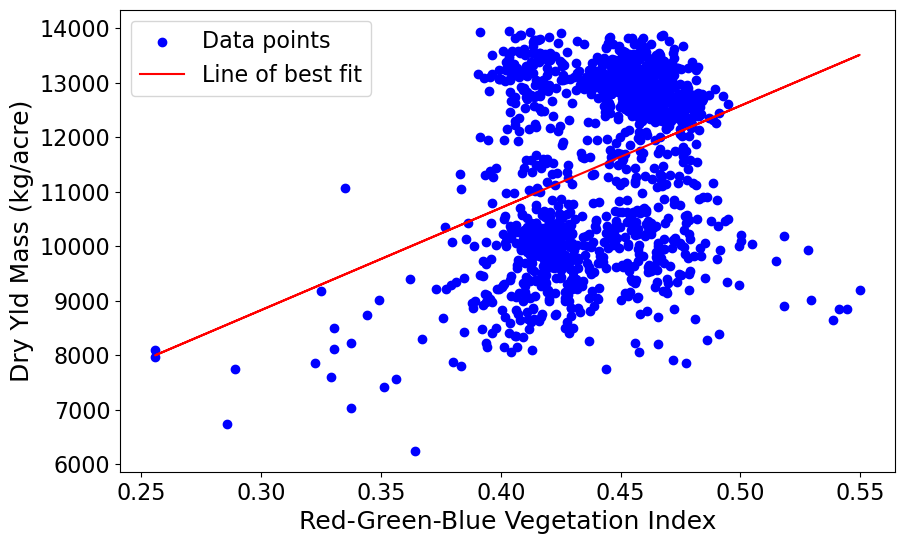

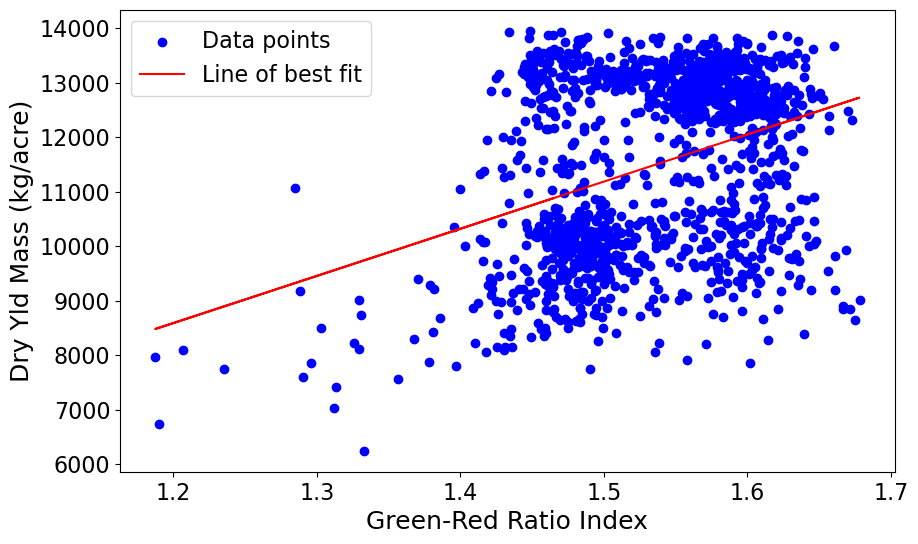

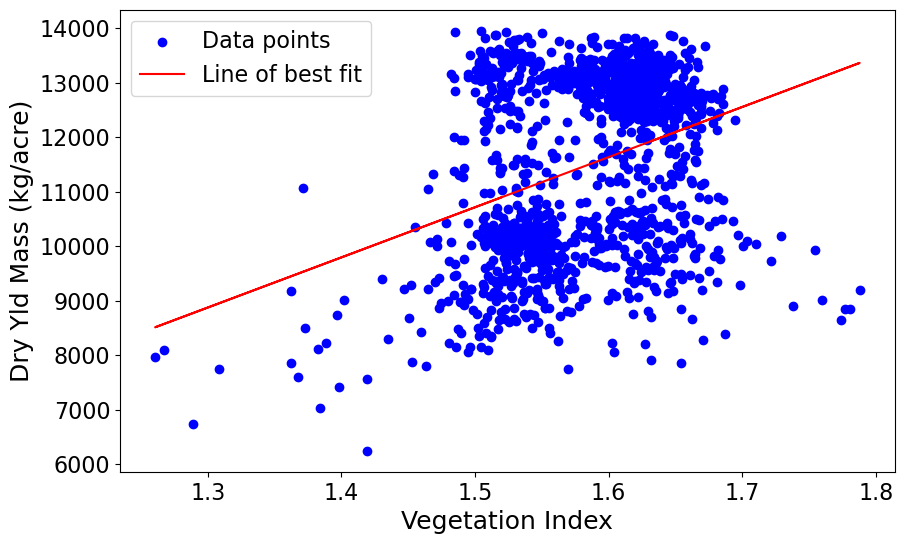

In [90]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
                'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
                'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

for var, title in zip(independent_vars, intitle_vars):
    plot_correlation_graphs_7_6_2020(pf, var, dependent_var, title)

In [100]:
#import data
pf = pd.read_csv('June_18_2020_New.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0     1  2020  6182020  39.832  49.734  33.297  41.508028  0.152604  0.110555   
1    10  2020  6182020  31.155  43.468  27.467  34.710888  0.194520  0.165003   
2   100  2020  6182020  29.002  39.506  24.811  31.714485  0.189716  0.153325   
3  1000  2020  6182020  30.214  41.284  26.505  33.265445  0.185581  0.154830   
4  1001  2020  6182020  37.434  47.021  31.010  39.046549  0.157540  0.113516   

       VARI  ...      right     bottom   Elevation(  Moisture(%    Yld Mass(D  \
0  0.175976  ... -93.539609  44.065627  1155.380859   17.449181   9881.252930   
1  0.261112  ... -93.539609  44.065280  1154.186401   17.942247  12222.727290   
2  0.240383  ... -93.539455  44.064894  1154.231293   17.909068  12463.730960   
3  0.246038  ... -93.537718  44.064894  1151.290283   16.049494  13023.604740   
4  0.179381  ... -93.537679  44.065627  1157.193878   17.780971   9459.528809   

   Yld Vol(Dr  Crop Flw(M   Crop Flw(V          X          Y  
0  176.450726   17.979465  1155.848663 -93.539628  44.065647  
1  218.262737   23.967403  1540.744019 -93.539628  44.065299  
2  222.566361   23.970981  1540.982849 -93.539474  44.064913  
3  232.564087   23.677465  1522.098511 -93.537737  44.064913  
4  168.919975   17.943057  1153.530029 -93.537698  44.065647  

[5 rows x 34 columns]

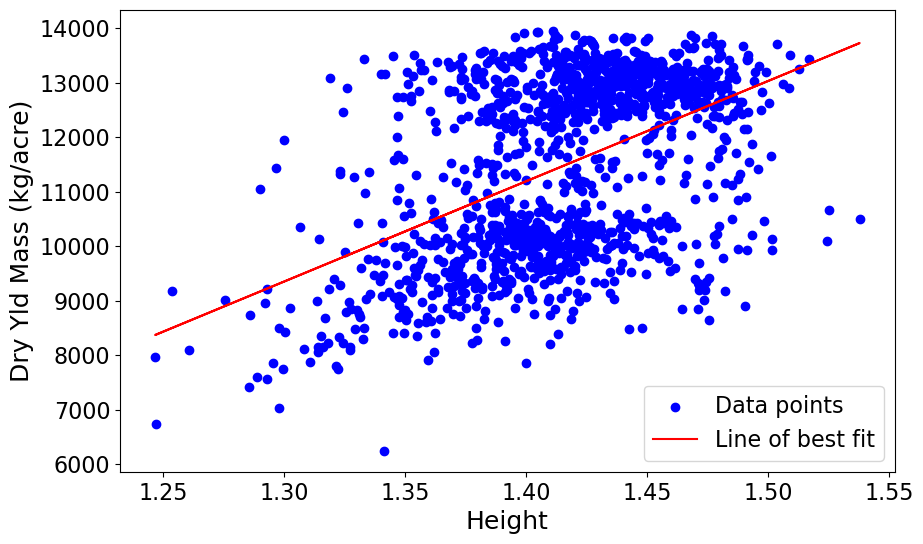

In [101]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

indep = 'Height'
title = 'Height'

# intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
#                 'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
#                 'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

# for var, title in zip(independent_vars, intitle_vars):
plot_correlation_graphs_6_18_2020(pf, var, dependent_var, title)

In [102]:
#import data
pf = pd.read_csv('June_23_2020_New.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0     1  2020  6232020  55.994  80.569  48.344  63.150176  0.213955  0.179954   
1    10  2020  6232020  49.068  75.690  43.456  57.807349  0.241308  0.213389   
2   100  2020  6232020  50.407  75.093  42.386  57.666852  0.236206  0.196701   
3  1000  2020  6232020  31.622  49.728  28.543  37.804443  0.246152  0.222569   
4  1001  2020  6232020  34.622  53.089  29.653  40.399774  0.245833  0.210544   

       VARI  ...      right     bottom   Elevation(  Moisture(%    Yld Mass(D  \
0  0.278568  ... -93.539609  44.065627  1155.380859   17.449181   9881.252930   
1  0.327446  ... -93.539609  44.065280  1154.186401   17.942247  12222.727290   
2  0.297014  ... -93.539455  44.064894  1154.231293   17.909068  12463.730960   
3  0.342871  ... -93.537718  44.064894  1151.290283   16.049494  13023.604740   
4  0.318078  ... -93.537679  44.065627  1157.193878   17.780971   9459.528809   

   Yld Vol(Dr  Crop Flw(M   Crop Flw(V          X          Y  
0  176.450726   17.979465  1155.848663 -93.539628  44.065647  
1  218.262737   23.967403  1540.744019 -93.539628  44.065299  
2  222.566361   23.970981  1540.982849 -93.539474  44.064913  
3  232.564087   23.677465  1522.098511 -93.537737  44.064913  
4  168.919975   17.943057  1153.530029 -93.537698  44.065647  

[5 rows x 34 columns]

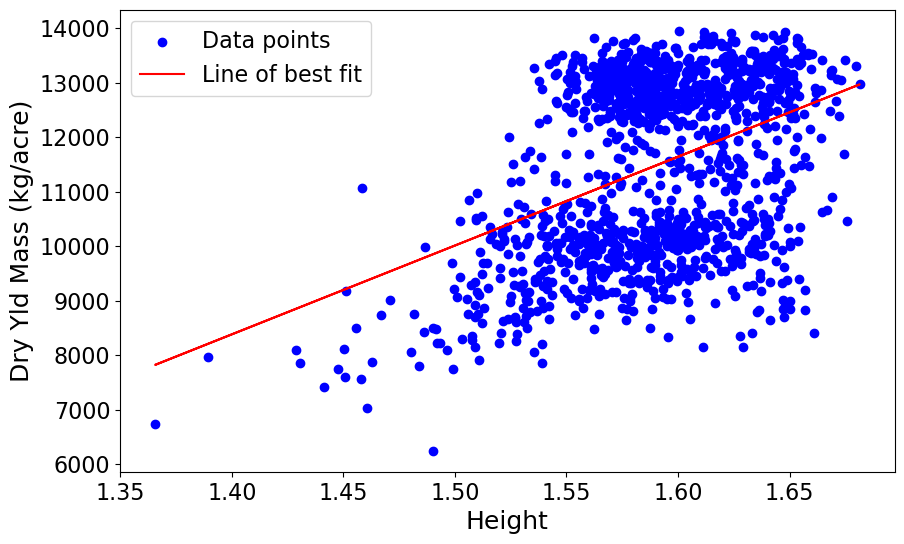

In [103]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

indep = 'Height'
title = 'Height'

# intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
#                 'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
#                 'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

# for var, title in zip(independent_vars, intitle_vars):
plot_correlation_graphs_6_23_2020(pf, var, dependent_var, title)

In [104]:
#import data
pf = pd.read_csv('June_30_2020_New.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0     1  2020  6302020  56.705  82.952  53.255  65.657156  0.202796  0.187939   
1    10  2020  6302020  60.073  89.548  56.748  70.351368  0.210448  0.196998   
2   100  2020  6302020  61.672  89.895  56.046  70.771229  0.208640  0.186208   
3  1000  2020  6302020  47.922  72.940  44.051  56.442455  0.226640  0.206996   
4  1001  2020  6302020  59.248  85.908  54.932  68.088263  0.201527  0.183664   

       VARI  ...      right     bottom   Elevation(  Moisture(%    Yld Mass(D  \
0  0.303778  ... -93.539609  44.065627  1155.380859   17.449181   9881.252930   
1  0.317369  ... -93.539609  44.065280  1154.186401   17.942247  12222.727290   
2  0.295464  ... -93.539455  44.064894  1154.231293   17.909068  12463.730960   
3  0.325709  ... -93.537718  44.064894  1151.290283   16.049494  13023.604740   
4  0.295487  ... -93.537679  44.065627  1157.193878   17.780971   9459.528809   

   Yld Vol(Dr  Crop Flw(M   Crop Flw(V          X          Y  
0  176.450726   17.979465  1155.848663 -93.539628  44.065647  
1  218.262737   23.967403  1540.744019 -93.539628  44.065299  
2  222.566361   23.970981  1540.982849 -93.539474  44.064913  
3  232.564087   23.677465  1522.098511 -93.537737  44.064913  
4  168.919975   17.943057  1153.530029 -93.537698  44.065647  

[5 rows x 34 columns]

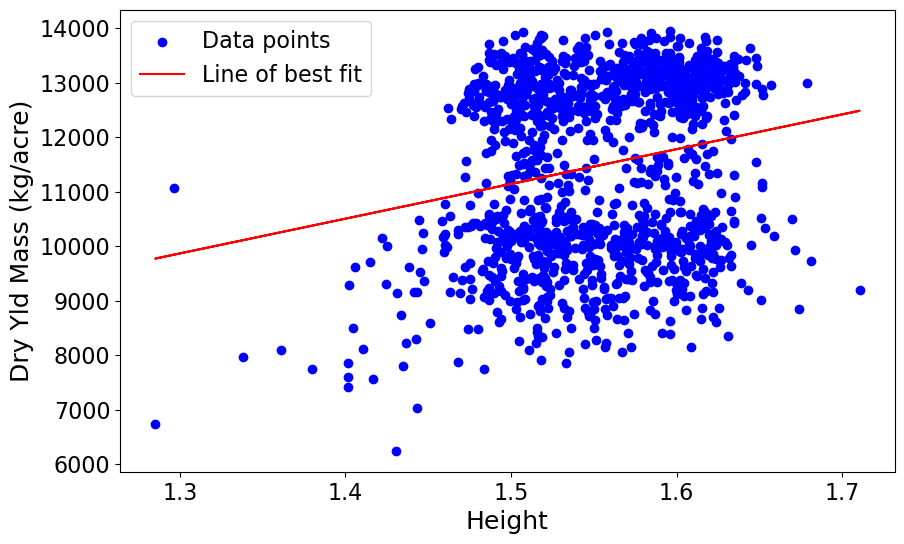

In [105]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

indep = 'Height'
title = 'Height'

# intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
#                 'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
#                 'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

# for var, title in zip(independent_vars, intitle_vars):
plot_correlation_graphs_6_30_2020(pf, var, dependent_var, title)

In [106]:
#import data
pf = pd.read_csv('July_6_2020_New.csv') 
pf.head()

Plot  Year     Date     Red    Green    Blue         BI       GLI  \
0     1  2020  7062020  40.327   64.136  37.284  48.750351  0.246067   
1    10  2020  7062020  38.754   62.752  36.086  47.405645  0.252885   
2   100  2020  7062020  38.045   62.098  35.574  46.794206  0.255678   
3  1000  2020  7062020  67.519   98.222  61.001  77.303511  0.209020   
4  1001  2020  7062020  71.878  103.180  64.797  81.672538  0.203143   

      NGRDI      VARI  ...      right     bottom   Elevation(  Moisture(%  \
0  0.227918  0.354411  ... -93.539609  44.065627  1155.380859   17.449181   
1  0.236420  0.366830  ... -93.539609  44.065280  1154.186401   17.942247   
2  0.240187  0.372516  ... -93.539455  44.064894  1154.231293   17.909068   
3  0.185247  0.293135  ... -93.537718  44.064894  1151.290283   16.049494   
4  0.178809  0.283890  ... -93.537679  44.065627  1157.193878   17.780971   

     Yld Mass(D  Yld Vol(Dr  Crop Flw(M   Crop Flw(V          X          Y  
0   9881.252930  176.450726   17.979465  1155.848663 -93.539628  44.065647  
1  12222.727290  218.262737   23.967403  1540.744019 -93.539628  44.065299  
2  12463.730960  222.566361   23.970981  1540.982849 -93.539474  44.064913  
3  13023.604740  232.564087   23.677465  1522.098511 -93.537737  44.064913  
4   9459.528809  168.919975   17.943057  1153.530029 -93.537698  44.065647  

[5 rows x 34 columns]

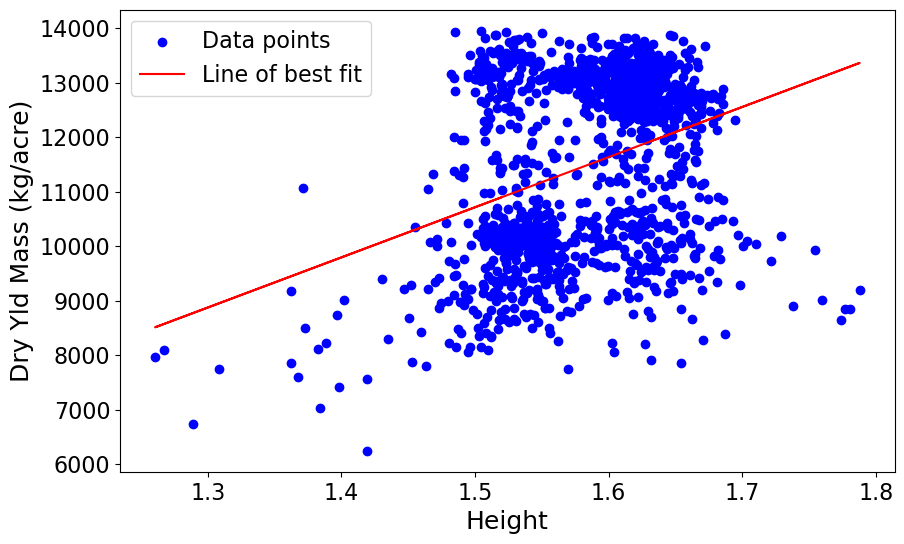

In [107]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

indep = 'Height'
title = 'Height'

# intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
#                 'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
#                 'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

# for var, title in zip(independent_vars, intitle_vars):
plot_correlation_graphs_7_6_2020(pf, var, dependent_var, title)